# Problem Statement:
    Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

# 1. Import libraries

In [1517]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn import metrics

# 2. Read and inspect data

## 2.1 Import data and understand data

In [1518]:
# import data
data = pd.read_csv('C:/Users/Nitin Koundilya/Downloads/Lead Scoring Assignment/Leads.csv')

In [1519]:
# check for shape of dataframe
data.shape

(9240, 37)

In [1520]:
pd.set_option('max_columns',100)

# check imported data 
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1521]:
# statical describption of data
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [1522]:
# info for data-types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 2.2 Treat Missing values in data

In [1523]:
#create a new copy of data

data1 = data.copy()
data1.head(10)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [1524]:
#check for missing values

round((100*(data1.isnull().sum()/data1.shape[0])),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1525]:
#Replacing value select as Nan(missing value).

data1 = data1.replace(to_replace='Select', value=np.nan)
data1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1526]:
#check for missing values after replacing Select as Nan

round((100*(data1.isnull().sum()/data1.shape[0])),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1527]:
# Evaluating column "How did you hear about X Education" before dropping as it might give some insights.

#checking distribution amoong unique values in column.
data1['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [1528]:
#Since it is observed that missing value is more than 78% stil just want to check for the %age distribution among unique values.

round(100*(data1['How did you hear about X Education'].value_counts(dropna=True)/data1['How did you hear about X Education'].count()),2)

Online Search            40.60
Word Of Mouth            17.49
Student of SomeSchool    15.58
Other                     9.35
Multiple Sources          7.64
Advertisements            3.52
Social Media              3.37
Email                     1.31
SMS                       1.16
Name: How did you hear about X Education, dtype: float64

##### Will drop column ""How did you hear about X Education"" and columns having high missing values

In [1529]:
#columns having high missing values are ['How did you hear about X Education','Lead Quality','Lead Profile'] which need to be dropped.

data1 = data1.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile'])

In [1530]:
#cross check
data1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


##### Will remove below columns as index and score assigned to each customer based on their activity and their profile. 
Asymmetrique Activity Index                      45.65, 
Asymmetrique Profile Index                       45.65, 
Asymmetrique Activity Score                      45.65, 
Asymmetrique Profile Score                       45.65

In [1531]:

# dropping mentioned columns

data1 = data1.drop(columns=['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'])

#cross check
data1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,NaN,NaN,No,No,No,No,No,No,No,No,NaN,No,No,Other Metro Cities,No,No,SMS Sent


#### Treatment of rest of the columns having missing values

In [1532]:

analysis_for_missing = (round((100*(data1.isnull().sum()/data1.shape[0])),2)>0)

In [1533]:
np.where(analysis_for_missing)[0]

array([ 3,  7,  9, 10, 11, 12, 13, 14, 23, 26], dtype=int64)

In [1534]:
analysis_for_missing[[ 3,  7,  9, 10, 11, 12, 13, 14, 23, 26]]

Lead Source                                      True
TotalVisits                                      True
Page Views Per Visit                             True
Last Activity                                    True
Country                                          True
Specialization                                   True
What is your current occupation                  True
What matters most to you in choosing a course    True
Tags                                             True
City                                             True
dtype: bool

In [1535]:
#store the columns which need to be analysed for treatment.

analysis_for_missing_col = ['Lead Source', 'TotalVisits', 'Page Views Per Visit','Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City']

#missing %ge

round((100*(data1[analysis_for_missing_col].isnull().sum()/data1.shape[0])),2)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
City                                             39.71
dtype: float64

In [1536]:
pd.set_option('max_columns',100)

data1[analysis_for_missing_col].head(5)

,Lead Source,TotalVisits,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Tags,City
0,Olark Chat,0.0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,Interested in other courses,NaN
1,Organic Search,5.0,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,Ringing,NaN
2,Direct Traffic,2.0,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Will revert after reading the email,Mumbai
3,Direct Traffic,1.0,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Ringing,Mumbai
4,Google,2.0,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,Will revert after reading the email,Mumbai


#### Analysis of Categorical columns for imputing missing values 

In [1537]:
# check for the unique value counts in categorical colunmns

analysis_for_missing_col_cat = 'Lead Source', 'Last Activity','Country','Specialization','What is your current occupation','What matters most to you in choosing a course','Tags','City'


for i in enumerate(analysis_for_missing_col_cat):
    print((i[0]+1),'Unique value %age for ', i[1],'\n', 100*(round(data1[i[1]].value_counts(dropna=False)/data1.shape[0],2)),'\n','\n')

1 Unique value %age for  Lead Source 
 Google               31.0
Direct Traffic       28.0
Olark Chat           19.0
Organic Search       12.0
Reference             6.0
Welingak Website      2.0
Referral Sites        1.0
Facebook              1.0
NaN                   0.0
bing                  0.0
google                0.0
Click2call            0.0
Live Chat             0.0
Press_Release         0.0
Social Media          0.0
welearnblog_Home      0.0
blog                  0.0
Pay per Click Ads     0.0
youtubechannel        0.0
NC_EDM                0.0
testone               0.0
WeLearn               0.0
Name: Lead Source, dtype: float64 
 

2 Unique value %age for  Last Activity 
 Email Opened                    37.0
SMS Sent                        30.0
Olark Chat Conversation         11.0
Page Visited on Website          7.0
Converted to Lead                5.0
Email Bounced                    4.0
Email Link Clicked               3.0
Form Submitted on Website        1.0
NaN           

##### Insights:
    1. Lead Source Columns: 'Google','Direct Traffic','Olark Chat','Organic Search', 'Reference' can be considered as different categories and rest can be considered in Lead_Source_Others category.
    Will impute missing values with mode. Also lowercase google need to be replaced with uppercase Google.
    
    2. Last Activity: 'Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website' can be considered as different categories and rest other can be considered in Last_Activity_others category.
    Will impute missing values with mode.
    
    3. Country: Looking at country it is clear that 70% is of India and 27% is missing values, which if imputed with mode will comprise of 97%. Hence this column does not give any significant information and can be dropped.
    
    4.Specialization: As we can see in Specialization column maximum percentage is of missing value that is 37%, need to check for missing values in rows.
    
    5. What is your current occupation: 61% is unemployed and 29% is missing value and after that 8% are working professional and 2% are student. need to check for missing values in rows.
    
    6. What matters most to you in choosing a course: Clearly it 71% for better career prospects and 29% missing value, rest less than 1%. Hence this column can be dropped.
    
    7.Tags : For Tags 36% is Null values, and rest Will revert after reading the email has 22% and Ringing has  13%, also Tags columns can be dropped as it is given by executives of the company after attempting call to leads. need to check for missing values in rows.
    
    8.City: 40% is missing value and 35% is Mumbai, if we impute missing values with mode, then also this column doe not give any significant information. need to check for missing values in rows.
   

In [1538]:
data1.shape

(9240, 30)

#### Analysis of Continuous columns for treating missing values

In [1539]:
#check for statistical information.

data1[['TotalVisits','Page Views Per Visit']].describe()


,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [1540]:
#Check for skewness of the distribution of continuous data
data1.skew()

Lead Number                     0.140451
Converted                       0.471058
TotalVisits                    19.911657
Total Time Spent on Website     0.956450
Page Views Per Visit            2.871793
dtype: float64

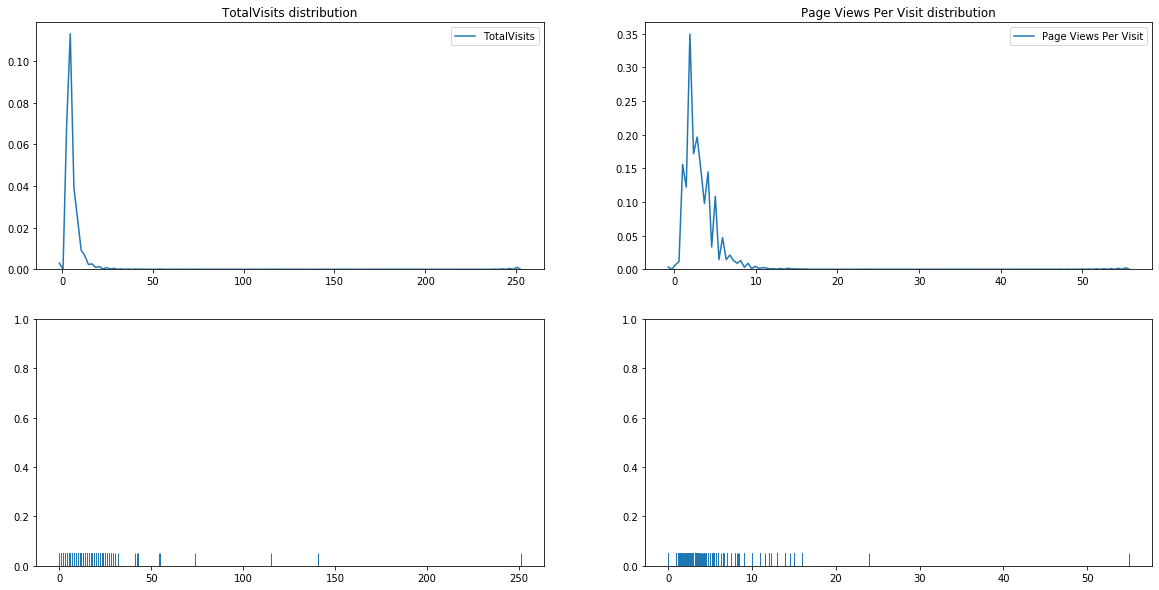

In [1541]:
# Distribution of continuous variable 

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("TotalVisits distribution")
sns.kdeplot(data1['TotalVisits'])
plt.subplot(2,2,2)
plt.title("Page Views Per Visit distribution")
sns.kdeplot(data1['Page Views Per Visit'])
plt.subplot(2,2,3)
sns.rugplot(data1['TotalVisits'])
plt.subplot(2,2,4)
sns.rugplot(data1['Page Views Per Visit'])

###### As both continuous columns seems to be skewed, will impute missing values with median.

In [1542]:
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [1543]:
# replacing null values with median of that column.
data1["TotalVisits"].fillna(value=data1["TotalVisits"].median(),  inplace=True)

#corss check
print("After replacing null values with median of TotalVisits column, sum of null values is :", data1["TotalVisits"].isnull().sum())

data1["Page Views Per Visit"].fillna(value=data1["Page Views Per Visit"].median(),  inplace=True)
print("After replacing null values with median of Page Views Per Visits column, sum of null values is :",data1["Page Views Per Visit"].isnull().sum())

After replacing null values with median of TotalVisits column, sum of null values is : 0
After replacing null values with median of Page Views Per Visits column, sum of null values is : 0


In [1544]:
#cross-check for null values
data1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

#### Replacing null values of Lead Source with mode of that column.

In [1545]:
#imputing Lead Source with mode
data1["Lead Source"].fillna(value=data1["Lead Source"].mode()[0], inplace=True)

#cross-check for null value after replacing missing values
data1["Lead Source"].isnull().sum()

0

#### Clubbing of other values (marginal %age) of column Lead Score in Others column

In [1546]:
## As it is clear that there is lowercase google and Uppercase google. So first of all will replace lowercase google to uppercase google.

data1["Lead Source"].replace(to_replace='google', value='Google', inplace=True)

## cross check
data1["Lead Source"].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
WeLearn                 1
welearnblog_Home        1
blog                    1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

In [1547]:
Lead_Source_Unique_values = pd.DataFrame(data1["Lead Source"].value_counts())
Lead_Source_Unique_values.index

Index(['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference',
       'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call',
       'Live Chat', 'Press_Release', 'Social Media', 'WeLearn',
       'welearnblog_Home', 'blog', 'Pay per Click Ads', 'youtubechannel',
       'NC_EDM', 'testone'],
      dtype='object')

In [1548]:
Lead_Source_to_be_clubbed = ['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Social Media', 'Press_Release', 'Live Chat',
       'youtubechannel', 'WeLearn', 'Pay per Click Ads', 'testone', 'blog',
       'NC_EDM', 'welearnblog_Home']
data1["Lead Source"].replace(to_replace=Lead_Source_to_be_clubbed, value="Lead_Source_Others", inplace=True)

#cross check
round(data1["Lead Source"].value_counts()/data1.shape[0],2)

Google                0.31
Direct Traffic        0.28
Olark Chat            0.19
Organic Search        0.12
Reference             0.06
Lead_Source_Others    0.04
Name: Lead Source, dtype: float64

#### Clubbing of other values(marginal %age) of column Last Activity in others column 

In [1549]:
round(100*(data1["Last Activity"].value_counts(dropna=False)/data1.shape[0]),2)

Email Opened                    37.20
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
NaN                              1.11
Unreachable                      1.01
Unsubscribed                     0.66
Had a Phone Conversation         0.32
Approached upfront               0.10
View in browser link Clicked     0.06
Email Marked Spam                0.02
Email Received                   0.02
Visited Booth in Tradeshow       0.01
Resubscribed to emails           0.01
Name: Last Activity, dtype: float64

In [1550]:
# Only 1% is missing value, it is better to not impute this value and consider it in others category.

Last_Activity_to_be_clubbed = pd.DataFrame(data1["Last Activity"].value_counts(dropna=False))
Last_Activity_to_be_clubbed.index

Index([                'Email Opened',                     'SMS Sent',
            'Olark Chat Conversation',      'Page Visited on Website',
                  'Converted to Lead',                'Email Bounced',
                 'Email Link Clicked',    'Form Submitted on Website',
                                  nan,                  'Unreachable',
                       'Unsubscribed',     'Had a Phone Conversation',
                 'Approached upfront', 'View in browser link Clicked',
                  'Email Marked Spam',               'Email Received',
         'Visited Booth in Tradeshow',       'Resubscribed to emails'],
      dtype='object')

In [1551]:
Last_Activity_to_be_clubbed_col = ['Converted to Lead', 'Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable', 'Unsubscribed','Had a Phone Conversation','Approached upfront', 'View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow','Resubscribed to emails']

#replacing marginal values into one group Last_Activity_Others
data1["Last Activity"].replace(to_replace=Last_Activity_to_be_clubbed_col, value='Last_Activity_Others', inplace=True)

data1["Last Activity"].fillna(value="Last_Activity_Others",  inplace=True)
#cross-check
data1["Last Activity"].value_counts(dropna=False)

Email Opened               3437
SMS Sent                   2745
Last_Activity_Others       1445
Olark Chat Conversation     973
Page Visited on Website     640
Name: Last Activity, dtype: int64

#### Drop Country column as it has 70% of data as India and 27% is missing.

In [1552]:
#dropping Country column
data1 = data1.drop(columns=["Country"])

#cross-check
data1.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Last_Activity_Others,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Last_Activity_Others,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Drop column What matters most to you in choosing a course, as majority of data is for better career.

In [1553]:
# dropping column
data1 = data1.drop(columns='What matters most to you in choosing a course')

#cross check
data1.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Last_Activity_Others,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Last_Activity_Others,NaN,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Handling missing values where it is neither in high %age or low %age

In [1554]:
data1.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Specialization                              3380
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [1555]:
data1.shape

(9240, 28)

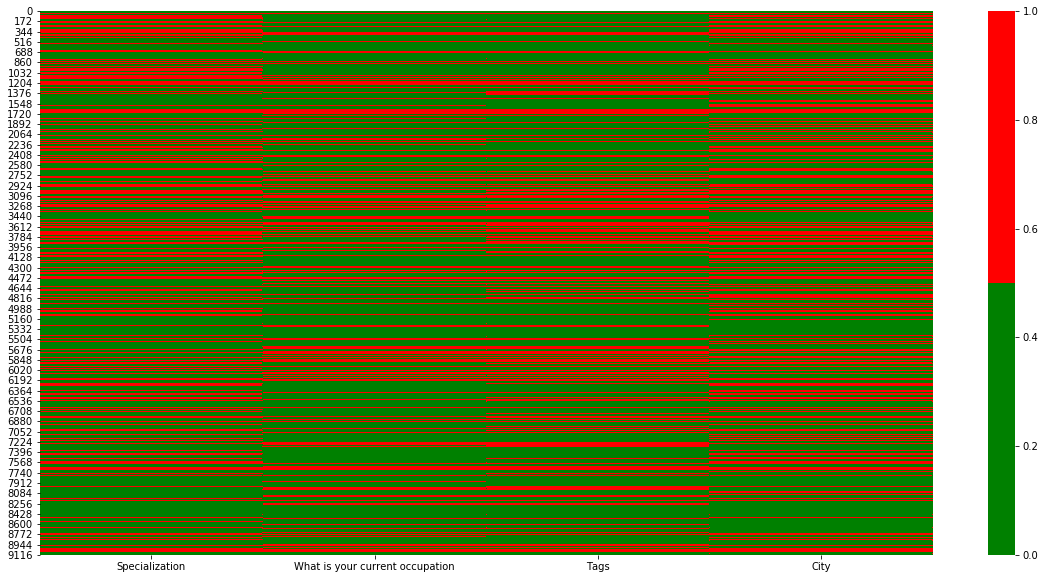

In [1556]:
cols = ['Specialization','What is your current occupation','Tags','City']

plt.figure(figsize=(20,10))
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(['g','r']))

In [1557]:
#Tags can be dropped

data1 = data1.drop(columns='Tags')

#cross check
data1

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Last_Activity_Others,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Last_Activity_Others,NaN,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,NaN,No,No,No,No,No,No,No,No,No,No,Other Metro Cities,No,No,SMS Sent


In [1558]:
# For City column, since %age of missing values is high therefore will club the metro cities, tier-2 cities and other cities.

data1['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [1559]:
#Imputing null values 
data1["City"].fillna(value='Other Cities', inplace=True)

#Clubbing of marginal values 
data1["City"].replace(to_replace=['Thane & Outskirts','Mumbai','Other Cities of Maharashtra','Other Metro Cities'], value='Metro Cities', inplace=True)

#cross check
data1['City'].value_counts()

Metro Cities      4811
Other Cities      4355
Tier II Cities      74
Name: City, dtype: int64

In [1560]:
data1.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                    0
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                    0
Total Time Spent on Website                    0
Page Views Per Visit                           0
Last Activity                                  0
Specialization                              3380
What is your current occupation             2690
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates

In [1561]:
data1['Specialization'].fillna(value='N_A', inplace=True)
data1['What is your current occupation'].fillna(value='N_A', inplace=True)

In [1562]:
data1.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [1563]:
# will drop the rows in which all the 2 columns(['Specialization','What is your current occupation']) have missing value

index_names = data1[(data1['Specialization'] == 'N_A') & (data1['What is your current occupation']== 'N_A')].index

index_names

Int64Index([   5,    7,   16,   33,   47,   49,   53,   54,   63,   83,
            ...
            9136, 9137, 9154, 9159, 9165, 9173, 9187, 9207, 9208, 9214],
           dtype='int64', length=1433)

In [1564]:
data1.drop(index_names, inplace=True)

In [1565]:
data1.shape

(7807, 27)

In [1566]:

print("After deleting Null values from both columns retained %age of rows is ", round((100*(data1.shape[0]/9240)),2))

After deleting Null values from both columns retained %age of rows is  84.49


In [1567]:
#Now check for the remaining N_A values in both columns

round(100*(data1['Specialization'].value_counts()/data1.shape[0]),2)

N_A                                  24.94
Finance Management                   12.50
Human Resource Management            10.86
Marketing Management                 10.73
Operations Management                 6.44
Business Administration               5.16
IT Projects Management                4.69
Supply Chain Management               4.47
Banking, Investment And Insurance     4.33
Travel and Tourism                    2.60
Media and Advertising                 2.60
International Business                2.28
Healthcare Management                 2.04
Hospitality Management                1.46
E-COMMERCE                            1.43
Retail Management                     1.28
Rural and Agribusiness                0.94
E-Business                            0.73
Services Excellence                   0.51
Name: Specialization, dtype: float64

In [1568]:
round(100*(data1['What is your current occupation'].value_counts()/data1.shape[0]),2)

Unemployed              71.73
N_A                     16.10
Working Professional     9.04
Student                  2.69
Other                    0.20
Housewife                0.13
Businessman              0.10
Name: What is your current occupation, dtype: float64

In [1569]:
#Will club N_A values of both columns accordingly.

data1['Specialization'].replace(to_replace=['N_A','Services Excellence','E-Business','Rural and Agribusiness','Retail Management','E-COMMERCE','Hospitality Management','Healthcare Management','International Business','Travel and Tourism','Media and Advertising'], value="Other_Specialization", inplace=True)

#cross-check
data1['Specialization'].value_counts()

Other_Specialization                 3186
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Name: Specialization, dtype: int64

In [1570]:
data1['What is your current occupation'].replace(to_replace=['N_A','Businessman', 'Housewife', 'Other'], value='Other_Occupation', inplace=True)

#cross-check
data1['What is your current occupation'].value_counts()

Unemployed              5600
Other_Occupation        1291
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

#### Final dataframe cross-check after treating missing values

In [1571]:
data1.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content 

In [1572]:
data1.shape

(7807, 27)

## Preparing data to proceed further

In [1573]:
data1.shape

(7807, 27)

In [1574]:
data1['Prospect ID'].value_counts()

5a7b1785-1287-4504-b242-23436c2b59a7    1
e520386a-d1d6-460e-8334-443e70aaa74c    1
d6a3cb74-6302-4fb5-856b-76717e820eef    1
8b711a3a-2409-4523-b262-e5a2d9670906    1
bac97ec1-202b-423e-8df7-507372692ece    1
                                       ..
e6da5e48-fd73-4f9a-ad72-b2cee4e4b24f    1
c7a9f563-bb0c-4405-801f-84eb0879bc5f    1
df7d4fa3-1993-49d8-a756-a7b12309c572    1
d96d1ce9-7fb3-4970-b12a-257429d60218    1
15714157-5196-4915-b008-d1e857d09122    1
Name: Prospect ID, Length: 7807, dtype: int64

In [1575]:
data1['Lead Number'].value_counts()

585722    1
619884    1
611640    1
656698    1
593211    1
         ..
594647    1
654179    1
582361    1
582137    1
655360    1
Name: Lead Number, Length: 7807, dtype: int64

In [1576]:
#dropping Prspect Id as there is no duplicate or multiple Prospect ID and Lead Number, which implies that in the given dataset every Prospect ID is linked to unique Lead Number. hence only one is enough for the identification purpose.

data1.drop(columns='Prospect ID', inplace=True)

#cross-check
data1.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Last_Activity_Others,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Last_Activity_Others,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,Modified


In [1577]:
data1['Lead Origin'].value_counts()

Landing Page Submission    4840
API                        2202
Lead Add Form               718
Lead Import                  46
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [1578]:
#clubbing the marginal %ge of column Lead Origin to others
data1['Lead Origin'].replace(to_replace=['Lead Import', 'Quick Add Form'], value='Other_Lead_Origin', inplace =True)

#cross check
data1['Lead Origin'].value_counts()

Landing Page Submission    4840
API                        2202
Lead Add Form               718
Other_Lead_Origin            47
Name: Lead Origin, dtype: int64

In [1579]:
100*(data1['Last Notable Activity'].value_counts()/data1.shape[0])

Modified                        33.700525
Email Opened                    31.830409
SMS Sent                        26.322531
Page Visited on Website          3.496862
Email Link Clicked               1.652363
Olark Chat Conversation          1.127194
Email Bounced                    0.730114
Unsubscribed                     0.512361
Unreachable                      0.371462
Had a Phone Conversation         0.179326
Email Marked Spam                0.025618
Approached upfront               0.012809
Form Submitted on Website        0.012809
Email Received                   0.012809
View in browser link Clicked     0.012809
Name: Last Notable Activity, dtype: float64

In [1580]:

#clubbing the marginal %ge of column Lead Origin to others

data1['Last Notable Activity'].replace(to_replace=['Form Submitted on Website','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Had a Phone Conversation','Unreachable','Unsubscribed','Email Bounced','Olark Chat Conversation','Email Link Clicked','Page Visited on Website'], value='Other_Last_Notable_Activity', inplace = True)

#cross check
data1['Last Notable Activity'].value_counts()

Modified                       2631
Email Opened                   2485
SMS Sent                       2055
Other_Last_Notable_Activity     636
Name: Last Notable Activity, dtype: int64

In [1581]:
data1

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Other Cities,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Last_Activity_Others,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Last_Activity_Others,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,Other_Last_Notable_Activity
9236,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Other_Specialization,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,Yes,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,Yes,SMS Sent
9238,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other_Occupation,No,No,No,No,No,No,No,No,No,No,Metro Cities,No,No,SMS Sent


###### Need to convert all the Yes and No responses into binary 1 & 0

In [1582]:
data1.replace(to_replace='Yes', value=1, inplace=True)
data1.replace(to_replace='No', value=0, inplace=True)

#cross check
data1

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,Other_Last_Notable_Activity
9236,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,1,SMS Sent
9237,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,1,SMS Sent
9238,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other_Occupation,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,SMS Sent


In [1583]:
data1.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.0,7807.0,7807.0,7807.000000
mean,616957.163187,0.081850,0.000256,0.436659,3.771359,538.148713,2.601488,0.001537,0.0,0.000256,0.000128,0.000128,0.000512,0.000897,0.0,0.0,0.0,0.0,0.369668
std,23353.594140,0.274153,0.016005,0.496004,5.008587,557.151297,2.136753,0.039178,0.0,0.016005,0.011318,0.011318,0.022631,0.029932,0.0,0.0,0.0,0.0,0.482746
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596452.000000,0.000000,0.000000,0.000000,2.000000,61.000000,1.330000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,614878.000000,0.000000,0.000000,0.000000,3.000000,298.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637370.000000,0.000000,0.000000,1.000000,5.000000,1017.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


# 3. EDA

In [1584]:
data1.head(5)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Other Cities,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,0,0,0,0,Metro Cities,0,0,Modified


In [1585]:
Columns = data1.columns
Columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1586]:
Categorical_col = ['Lead Origin', 'Lead Source','Last Activity',
       'Specialization', 'What is your current occupation','Last Notable Activity']

Indicator_wheather_customer_had_seen_ad = [ 'Search','Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement',]

##### Univariate Analysis of Categorical columns w.r.t Converted field

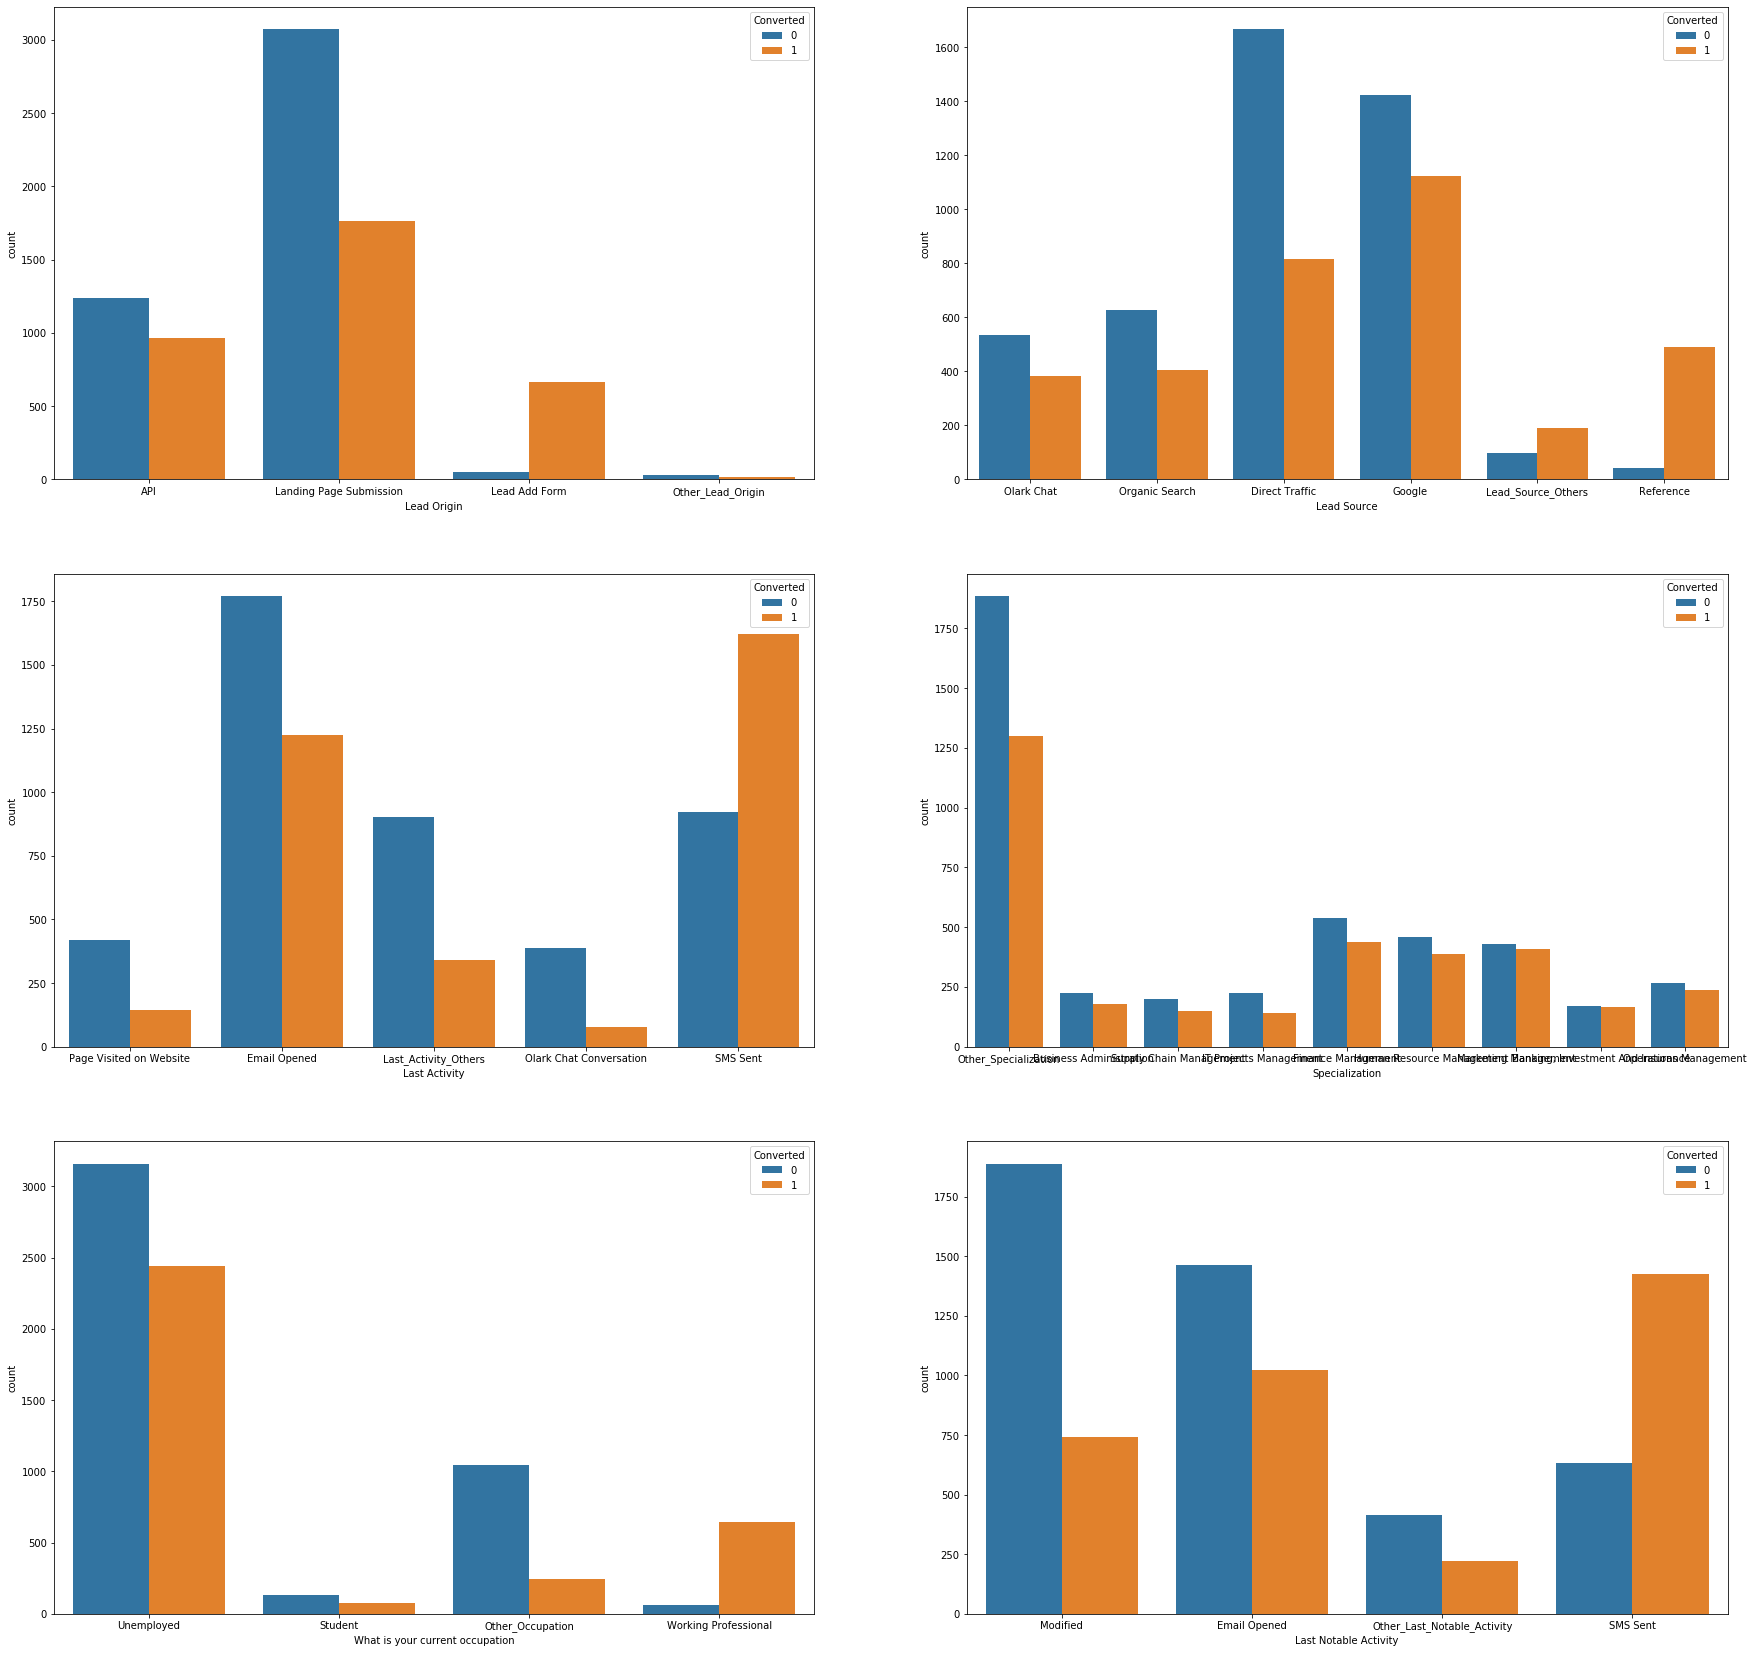

In [1587]:
# Univariate Analysis of Categorical columns w.r.t Converted field

plt.figure(figsize=(30,40))
for i in enumerate(Categorical_col):
    plt.subplot(4,2,(i[0]+1))
    sns.countplot(x=i[1], data=data1, hue='Converted')

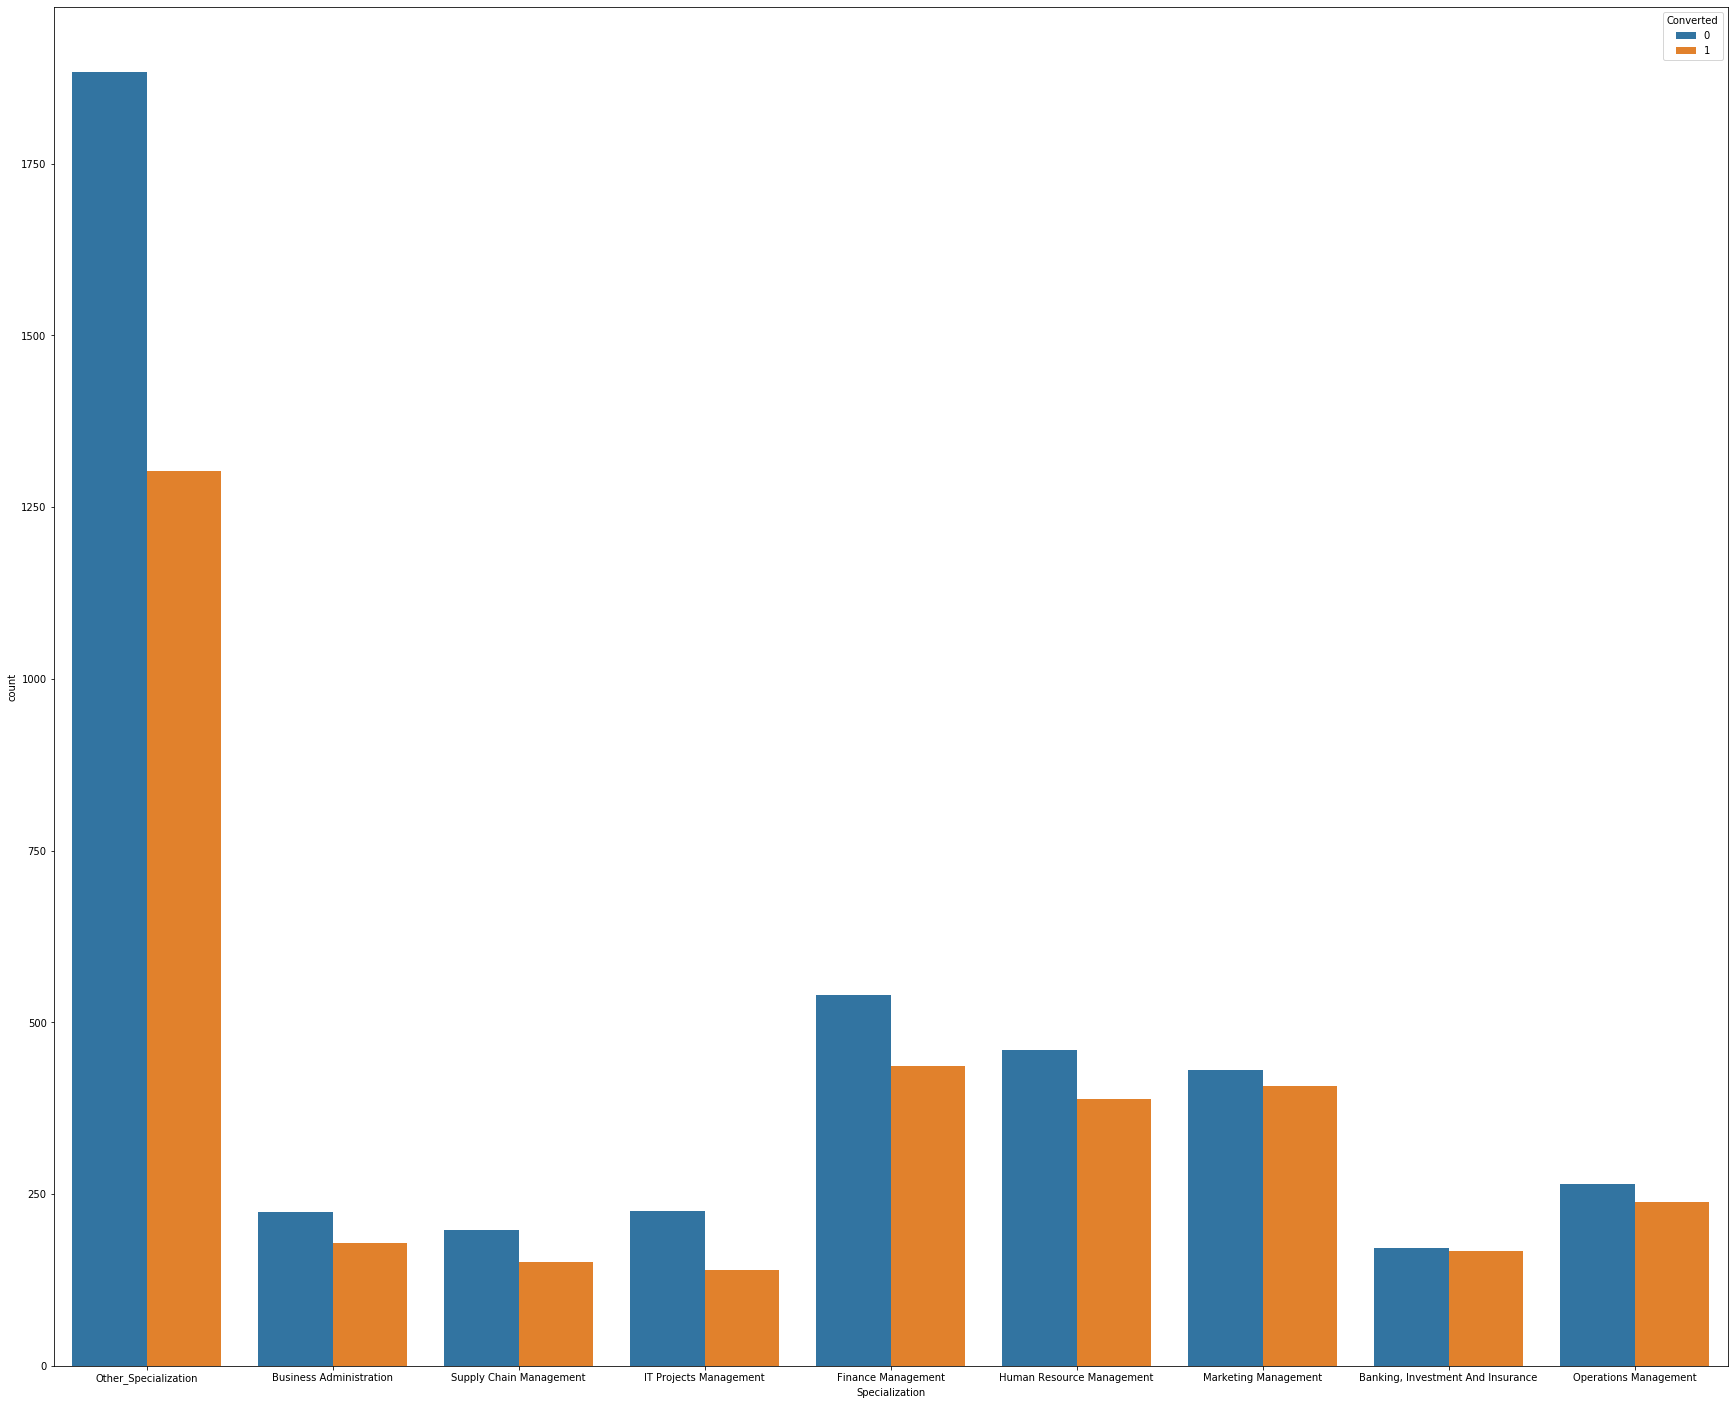

In [1588]:
plt.figure(figsize=(30,25))
sns.countplot(x='Specialization', data=data1, hue='Converted')

##### Insights :
       1.Lead origin:  It is clearly visible that Lead Add Form can be considered as imp factor in determination of Converted leads.
       2. Lead Source: Lead Source others and Reference can be considered as imp factor, as majority of leads converted. Still will need to check for Lead Source Others.
       3. Las Activity: Quite clear that SMS sent has much higher %age of Lead conversion.
       4. Specialization: Not much of information is received as almost all specializations seems to have good conversion rates.
       5.Current occupation: Mostly Unemployed and Working professional which have high conversion rates.
       Specially Working professionals is off the charts in conversion rate.
       6. Last Notable Activity: Seems to be quite similar to Last Activity and also this activity is performed once the sales representative contacted customer. hence will drop this column.
       

In [1589]:
# dropping Last notable Activity.

data1.drop(columns='Last Notable Activity', inplace=True)

# cross check
data1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [1590]:
data1.shape

(7807, 25)

In [1591]:
data1.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.0,7807.0,7807.0,7807.000000
mean,616957.163187,0.081850,0.000256,0.436659,3.771359,538.148713,2.601488,0.001537,0.0,0.000256,0.000128,0.000128,0.000512,0.000897,0.0,0.0,0.0,0.0,0.369668
std,23353.594140,0.274153,0.016005,0.496004,5.008587,557.151297,2.136753,0.039178,0.0,0.016005,0.011318,0.011318,0.022631,0.029932,0.0,0.0,0.0,0.0,0.482746
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596452.000000,0.000000,0.000000,0.000000,2.000000,61.000000,1.330000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,614878.000000,0.000000,0.000000,0.000000,3.000000,298.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637370.000000,0.000000,0.000000,1.000000,5.000000,1017.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


##### Analysis of continuous variables i.e. 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'

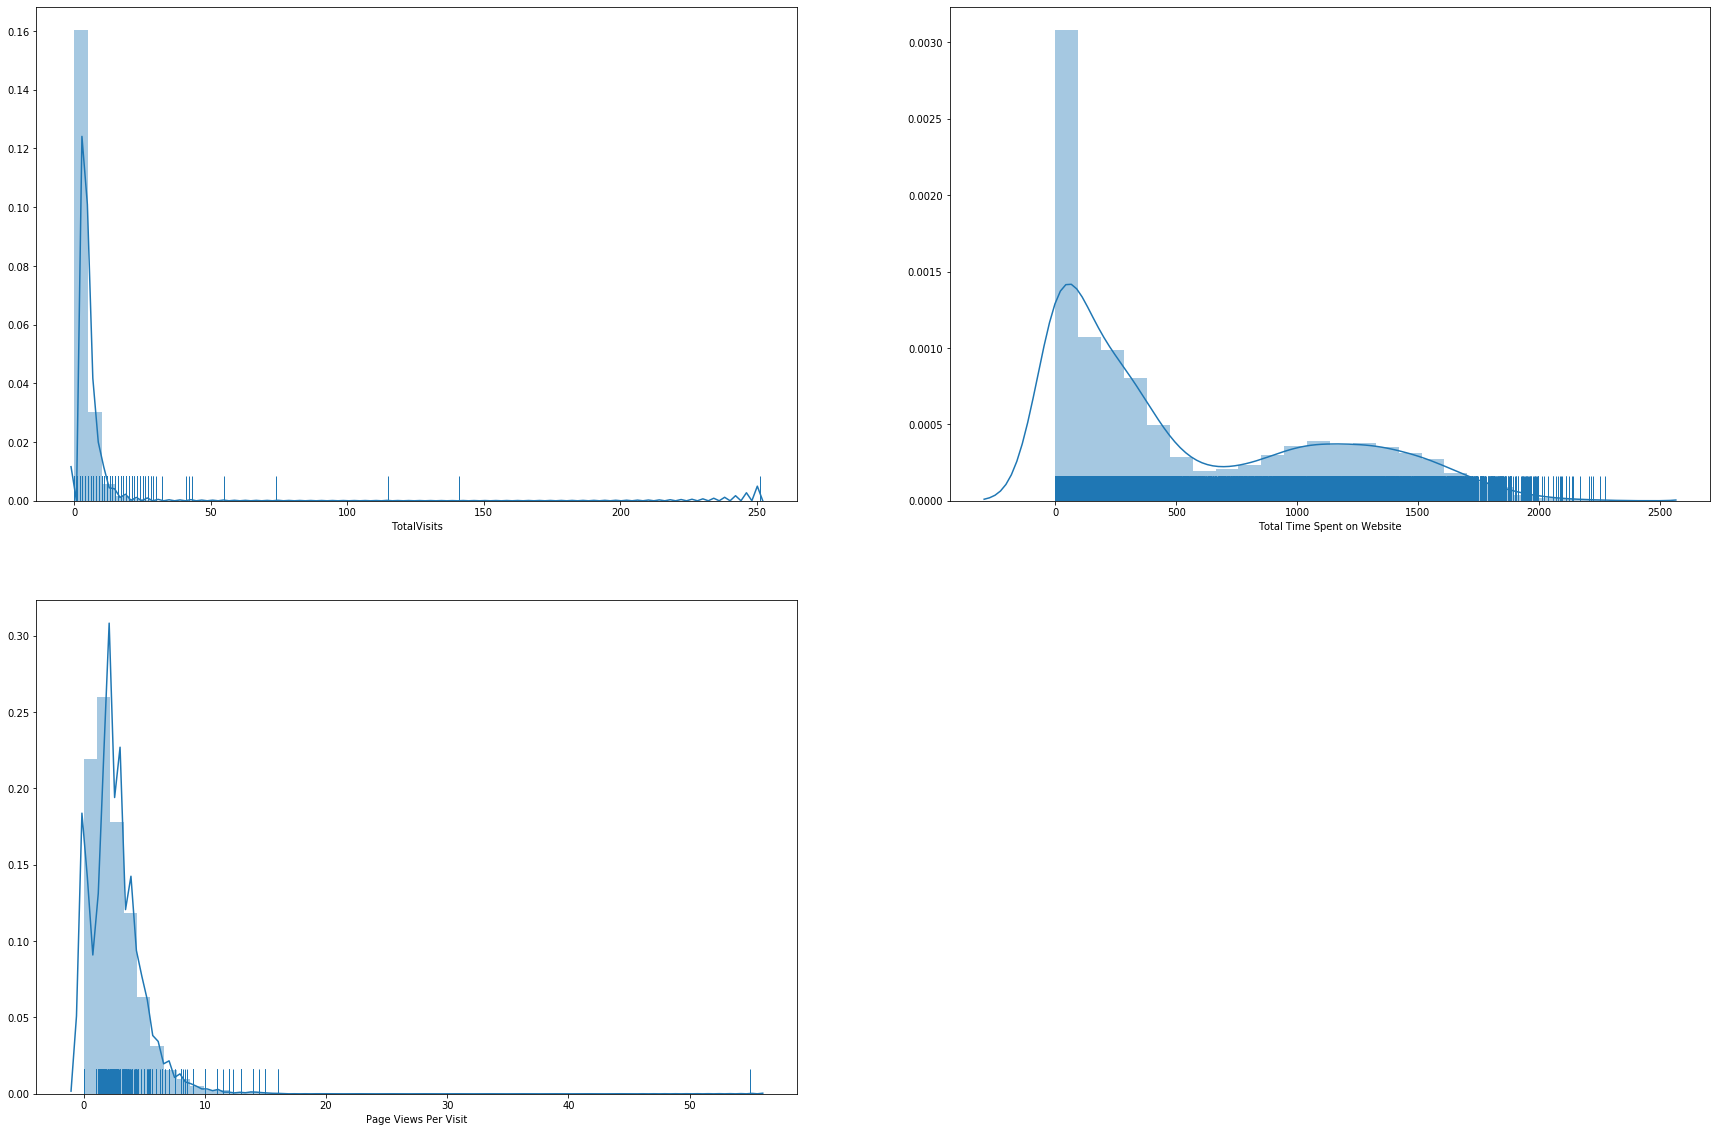

In [1592]:

univariate_analysis_continuous = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

# Univariate analysis of Continuous data 

plt.figure(figsize=(30,20))
for i in enumerate(univariate_analysis_continuous):
    plt.subplot(2,2,(i[0]+1))
    sns.distplot(data1[i[1]])
    sns.rugplot(data1[i[1]])
    
    


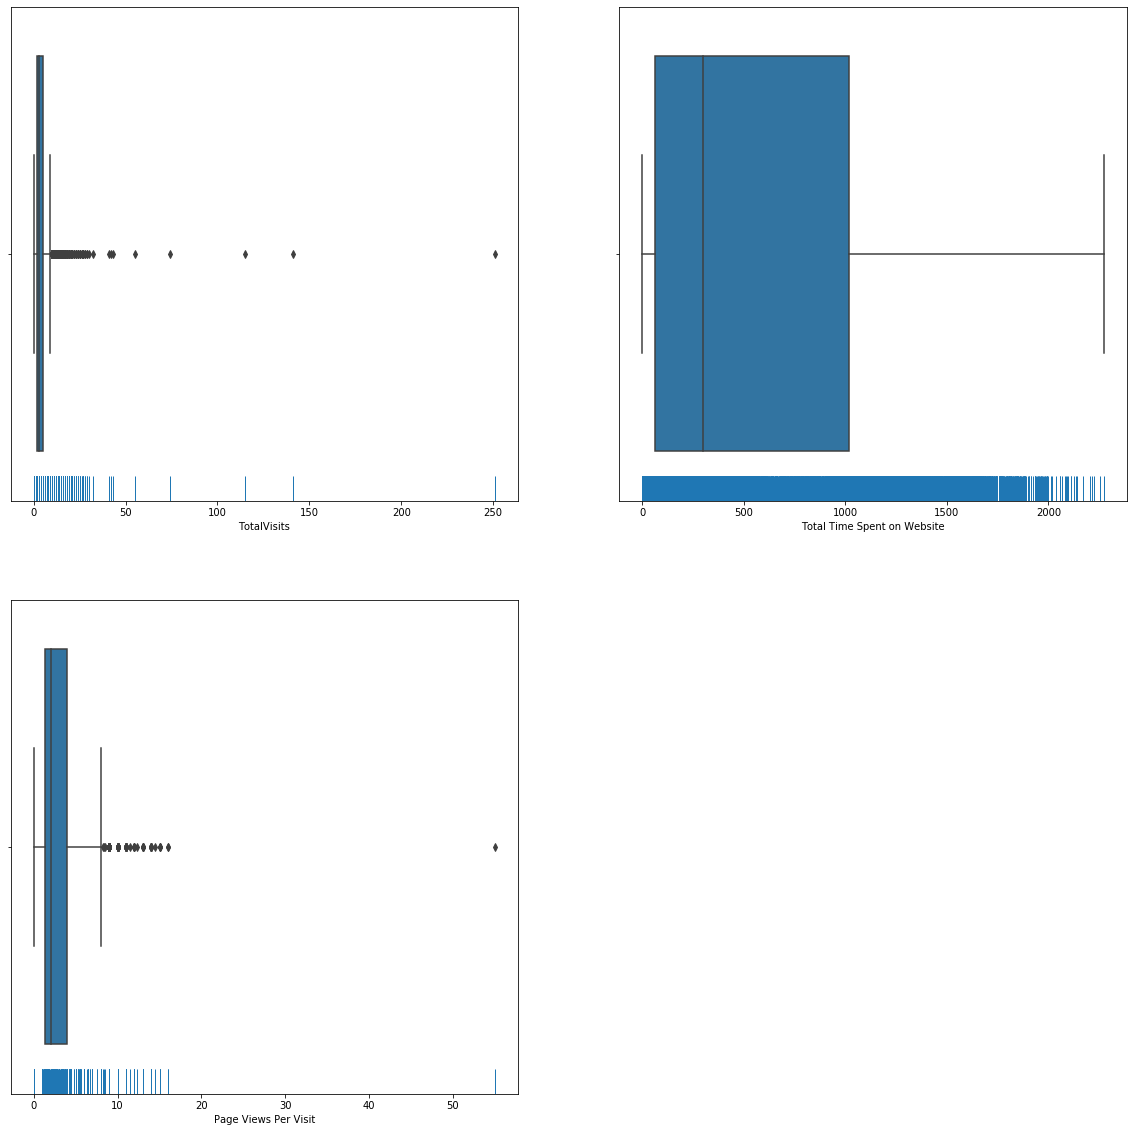

In [1593]:

plt.figure(figsize=(20,20))
for i in enumerate(univariate_analysis_continuous):
    plt.subplot(2,2,(i[0]+1))
    sns.boxplot(data1[i[1]])
    sns.rugplot(data1[i[1]])

##### As it is clearly visible that there is presence of outliers in columns TotalVisits and Page View Per Visit.

In [1594]:
#check for the 99%ile quantile to cap the outliers
q1 = data1['TotalVisits'].quantile(.99)
q2 = data1['Page Views Per Visit'].quantile(.99)

In [1595]:
print(q1, q2)

17.0 9.0


In [1596]:
#capping the outliers.

data1['TotalVisits'][data1['TotalVisits']>q1]=q1

data1['Page Views Per Visit'][data1['Page Views Per Visit']>q2]=q2

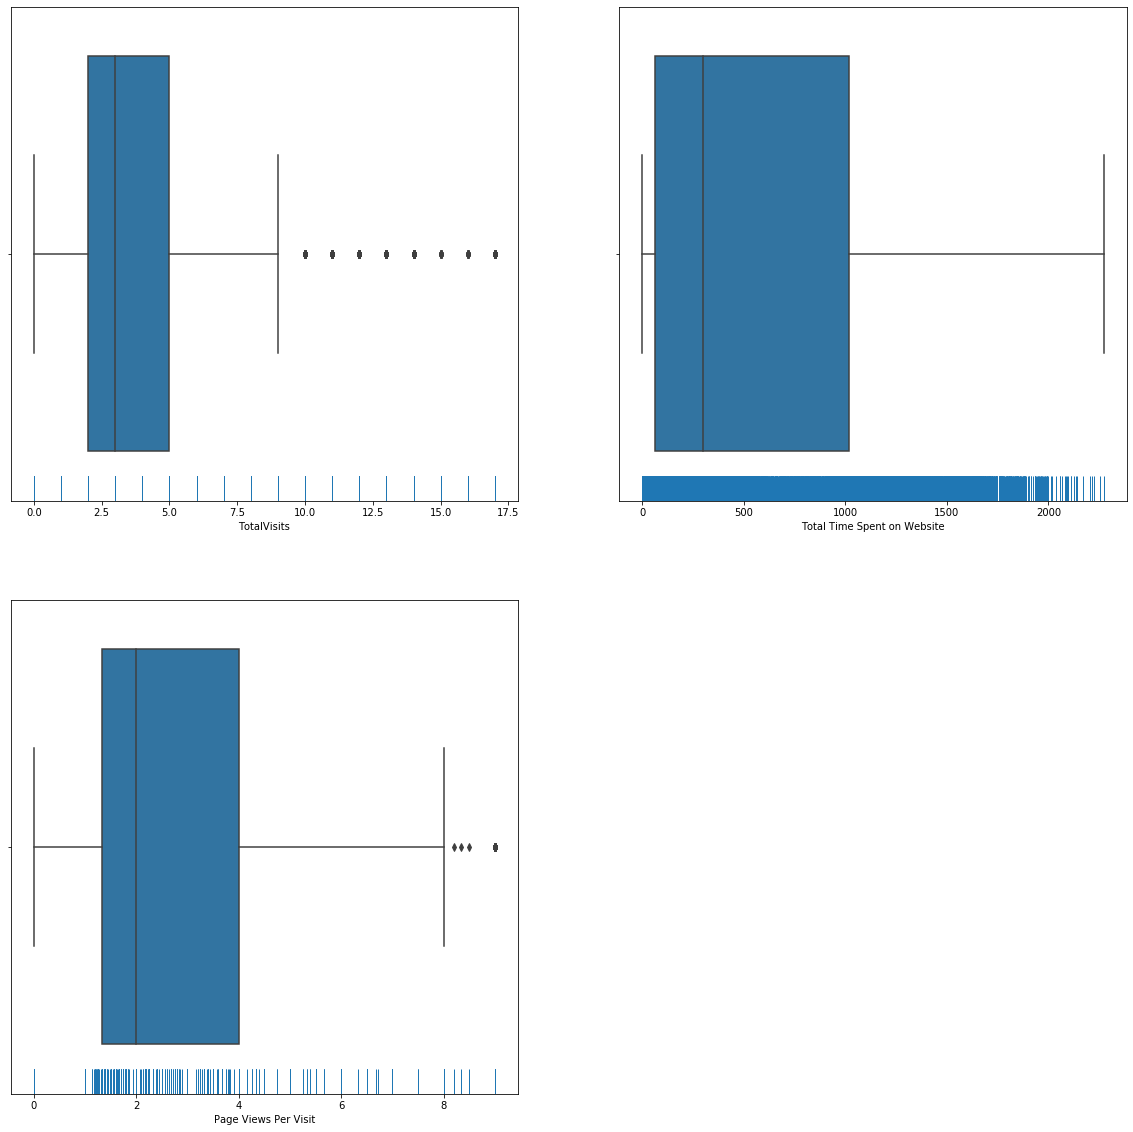

In [1597]:

# cross check
plt.figure(figsize=(20,20))
for i in enumerate(univariate_analysis_continuous):
    plt.subplot(2,2,(i[0]+1))
    sns.boxplot(data1[i[1]])
    sns.rugplot(data1[i[1]])

##### EDA for rest Columns.

In [1598]:
data1.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.000000,7807.000000,7807.000000,7807.000000,7807.000000,7807.0,7807.0,7807.0,7807.0,7807.000000
mean,616957.163187,0.081850,0.000256,0.436659,3.648264,538.148713,2.570961,0.001537,0.0,0.000256,0.000128,0.000128,0.000512,0.000897,0.0,0.0,0.0,0.0,0.369668
std,23353.594140,0.274153,0.016005,0.496004,3.229939,557.151297,1.951112,0.039178,0.0,0.016005,0.011318,0.011318,0.022631,0.029932,0.0,0.0,0.0,0.0,0.482746
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596452.000000,0.000000,0.000000,0.000000,2.000000,61.000000,1.330000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,614878.000000,0.000000,0.000000,0.000000,3.000000,298.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637370.000000,0.000000,0.000000,1.000000,5.000000,1017.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,17.000000,2272.000000,9.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


In [1599]:
data1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [1600]:
# as we can see that Column ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'] has nothing, that means everything is 0. Will analyze this column and will drop this column.

print(data1.Magazine.value_counts())
print(data1['Receive More Updates About Our Courses'].value_counts())
print(data1['Update me on Supply Chain Content'].value_counts())
print(data1['Get updates on DM Content'].value_counts())
print(data1['I agree to pay the amount through cheque'].value_counts())

0    7807
Name: Magazine, dtype: int64
0    7807
Name: Receive More Updates About Our Courses, dtype: int64
0    7807
Name: Update me on Supply Chain Content, dtype: int64
0    7807
Name: Get updates on DM Content, dtype: int64
0    7807
Name: I agree to pay the amount through cheque, dtype: int64


In [1601]:
# Every value corresponds to Denial for this mode of subscription.

#hence dropping this column.
data1.drop(columns='Magazine', inplace=True)
data1.drop(columns='Receive More Updates About Our Courses', inplace=True)
data1.drop(columns='Update me on Supply Chain Content', inplace=True)
data1.drop(columns='Get updates on DM Content', inplace=True)
data1.drop(columns='I agree to pay the amount through cheque', inplace=True)

#cross check
data1

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,Metro Cities,1
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Landing Page Submission,Direct Traffic,1,0,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,0,0,0,0,0,0,Metro Cities,0
9236,579546,Landing Page Submission,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,1
9237,579545,Landing Page Submission,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,0,0,0,0,0,0,Metro Cities,1
9238,579538,Landing Page Submission,Google,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other_Occupation,0,0,0,0,0,0,Metro Cities,0


# 4. Preparing Data for Model Building

#### First we will create dummy variables for the categorical columns.

In [1602]:
data1.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [1603]:
data1.head(2)

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0


In [1604]:
categorical_col = [['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 'What is your current occupation','City',]]

##### Creating Dummy for Lead Origin

In [1605]:
data1['Lead Origin'].value_counts()

Landing Page Submission    4840
API                        2202
Lead Add Form               718
Other_Lead_Origin            47
Name: Lead Origin, dtype: int64

In [1606]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['Lead Origin'])
dummy_Lead_Origin.drop(columns = 'Other_Lead_Origin', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='Lead Origin', inplace=True)

#cross check
data1

,Lead Number,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form
0,660737,Olark Chat,0,0,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0
1,660728,Organic Search,0,0,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0
2,660727,Direct Traffic,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,Metro Cities,1,0,1,0
3,660719,Direct Traffic,0,0,0,1.0,305,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0
4,660681,Google,0,0,1,2.0,1428,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,Direct Traffic,1,0,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0
9236,579546,Direct Traffic,0,0,0,2.0,238,2.00,SMS Sent,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0
9237,579545,Direct Traffic,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0
9238,579538,Google,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other_Occupation,0,0,0,0,0,0,Metro Cities,0,0,1,0


##### Creating Dummy for Lead Source

In [1607]:
data1['Lead Source'].value_counts()

Google                2549
Direct Traffic        2482
Organic Search        1034
Olark Chat             918
Reference              534
Lead_Source_Others     290
Name: Lead Source, dtype: int64

In [1608]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['Lead Source'])
dummy_Lead_Origin.drop(columns = 'Lead_Source_Others', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='Lead Source', inplace=True)

#cross check
data1

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference
0,660737,0,0,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,1,0,0
1,660728,0,0,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.00,Email Opened,Business Administration,Student,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0
3,660719,0,0,0,1.0,305,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0
4,660681,0,0,1,2.0,1428,1.00,Last_Activity_Others,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,Last_Activity_Others,IT Projects Management,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0
9236,579546,0,0,0,2.0,238,2.00,SMS Sent,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0
9237,579545,1,0,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0
9238,579538,0,0,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other_Occupation,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0


##### Creating Dummy for Last Activity

In [1609]:
data1['Last Activity'].value_counts()

Email Opened               2994
SMS Sent                   2544
Last_Activity_Others       1241
Page Visited on Website     565
Olark Chat Conversation     463
Name: Last Activity, dtype: int64

In [1610]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['Last Activity'])
dummy_Lead_Origin.drop(columns = 'Last_Activity_Others', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='Last Activity', inplace=True)

#cross check
data1

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent
0,660737,0,0,0,0.0,0,0.00,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,1,0,0,0,0,1,0
1,660728,0,0,0,5.0,674,2.50,Other_Specialization,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,0,1,0,1,0,0,0
2,660727,0,0,1,2.0,1532,2.00,Business Administration,Student,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,1,0,0,0
3,660719,0,0,0,1.0,305,1.00,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.00,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,IT Projects Management,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0
9236,579546,0,0,0,2.0,238,2.00,Other_Specialization,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1
9237,579545,1,0,0,2.0,199,2.00,Business Administration,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1
9238,579538,0,0,1,3.0,499,3.00,Human Resource Management,Other_Occupation,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,1


##### Creating Dummy for Specialization

In [1611]:
data1['Specialization'].value_counts()

Other_Specialization                 3186
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Name: Specialization, dtype: int64

In [1612]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['Specialization'])
dummy_Lead_Origin.drop(columns = 'Other_Specialization', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='Specialization', inplace=True)

#cross check
data1

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management
0,660737,0,0,0,0.0,0,0.00,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.50,Unemployed,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.00,Student,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.00,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.00,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,Unemployed,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9236,579546,0,0,0,2.0,238,2.00,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9237,579545,1,0,0,2.0,199,2.00,Unemployed,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
9238,579538,0,0,1,3.0,499,3.00,Other_Occupation,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


##### Creating Dummy for What is your current occupation

In [1613]:
data1['What is your current occupation'].value_counts()

Unemployed              5600
Other_Occupation        1291
Working Professional     706
Student                  210
Name: What is your current occupation, dtype: int64

In [1614]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['What is your current occupation'])
dummy_Lead_Origin.drop(columns = 'Other_Occupation', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='What is your current occupation', inplace=True)

#cross check
data1

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional
0,660737,0,0,0,0.0,0,0.00,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,0,5.0,674,2.50,0,0,0,0,0,0,Other Cities,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,2.00,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,660719,0,0,0,1.0,305,1.00,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,0,0,1,2.0,1428,1.00,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,0,0,0,0,0,0,Metro Cities,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9236,579546,0,0,0,2.0,238,2.00,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
9237,579545,1,0,0,2.0,199,2.00,0,0,0,0,0,0,Metro Cities,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
9238,579538,0,0,1,3.0,499,3.00,0,0,0,0,0,0,Metro Cities,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


##### Creating Dummy for City

In [1615]:
data1['City'].value_counts()

Metro Cities      4791
Other Cities      2942
Tier II Cities      74
Name: City, dtype: int64

In [1616]:
# Creating dummies for Lead Origin and dropping column Other_Lead_Origin

dummy_Lead_Origin = pd.get_dummies(data1['City'])
dummy_Lead_Origin.drop(columns = 'Other Cities', inplace=True)
data1 = pd.concat([data1,dummy_Lead_Origin], axis=1)
data1.drop(columns='City', inplace=True)

#cross check
data1

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
0,660737,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,0,5.0,674,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,660727,0,0,1,2.0,1532,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,660719,0,0,0,1.0,305,1.00,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,660681,0,0,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
9236,579546,0,0,0,2.0,238,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
9237,579545,1,0,0,2.0,199,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
9238,579538,0,0,1,3.0,499,3.00,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


#### Check for the data types

In [1617]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7807 entries, 0 to 9239
Data columns (total 39 columns):
Lead Number                               7807 non-null int64
Do Not Email                              7807 non-null int64
Do Not Call                               7807 non-null int64
Converted                                 7807 non-null int64
TotalVisits                               7807 non-null float64
Total Time Spent on Website               7807 non-null int64
Page Views Per Visit                      7807 non-null float64
Search                                    7807 non-null int64
Newspaper Article                         7807 non-null int64
X Education Forums                        7807 non-null int64
Newspaper                                 7807 non-null int64
Digital Advertisement                     7807 non-null int64
Through Recommendations                   7807 non-null int64
A free copy of Mastering The Interview    7807 non-null int64
API                  

In [1618]:
data1.shape

(7807, 39)

In [1619]:
# creating a copy of final prepared data for modelling purpouse
md = data1.copy()

In [1620]:
#cross check
md

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
0,660737,0,0,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,0,5.0,674,2.50,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,660727,0,0,1,2.0,1532,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,660719,0,0,0,1.0,305,1.00,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,660681,0,0,1,2.0,1428,1.00,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,579564,1,0,1,8.0,1845,2.67,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
9236,579546,0,0,0,2.0,238,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
9237,579545,1,0,0,2.0,199,2.00,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
9238,579538,0,0,1,3.0,499,3.00,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


# 5. Test_Train Split & Scaling

In [1621]:
#putting feature variable to X
X =  md.drop('Converted', axis=1)

#cross check
X.head()

,Lead Number,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,660727,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,660681,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [1622]:
# Putting response variable to y
y = md[['Lead Number','Converted']]

#cross check
y.head()

,Lead Number,Converted
0,660737,0
1,660728,0
2,660727,1
3,660719,0
4,660681,1


In [1623]:
# Splitting the data into train and test
X_train0, X_test0, y_train0, y_test0 = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [1624]:
X_train = X_train0.drop('Lead Number', axis=1)
X_test = X_test0.drop('Lead Number', axis=1)
y_train = y_train0.drop('Lead Number', axis=1)
y_test = y_test0.drop('Lead Number', axis=1)

In [1625]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
5001,0,0,1.028379,-0.344150,2.302796,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1114,0,0,0.720990,-0.554559,1.784461,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3028,0,0,-1.123341,-0.982509,-1.325553,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
5546,0,0,-0.201175,-0.379813,0.229454,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8044,0,0,-0.815952,0.426160,-0.807218,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1626]:
#check the conversion rate

converted = (sum(data['Converted'])/len(data['Converted'].index))*100
converted

38.53896103896104

We have around 38% conversion rate

# 6. Looking at correlations and dropping highly correlated features

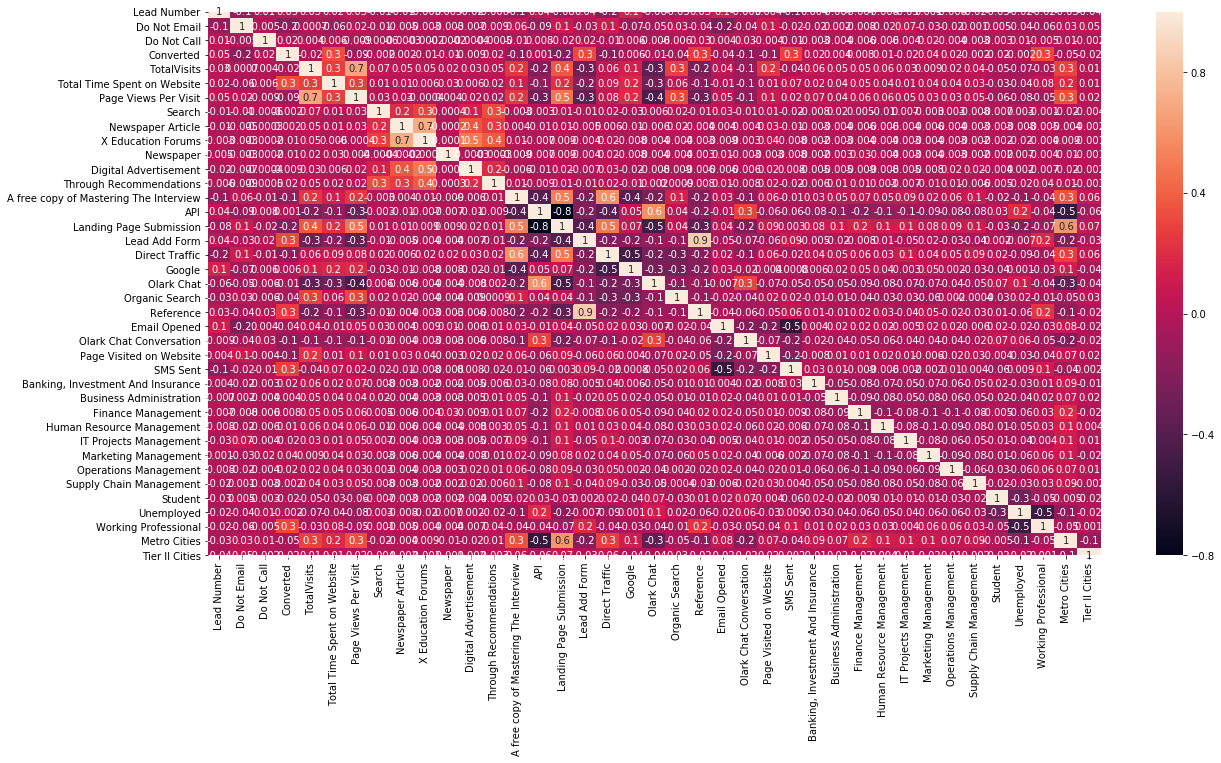

In [1627]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(md.corr(),annot = True, fmt='.1g')
plt.show()

In [1628]:
md.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
Lead Number,1.000000,-0.107114,0.013148,0.050039,0.027949,0.021676,0.045903,-0.013834,-0.013247,-0.003327,0.005125,-0.019090,-0.006003,-0.117636,0.044397,-0.078987,0.035194,-0.156949,0.143587,-0.056618,-0.028921,0.030143,0.111731,-0.008800,0.003941,-0.140273,0.004287,-0.007367,-0.007386,-0.008134,-0.032375,0.001326,-0.008364,-0.019124,-0.032248,-0.017122,-0.016220,-0.029780,-0.041977
Do Not Email,-0.107114,1.000000,-0.004779,-0.159238,0.000689,-0.061123,0.015830,-0.011715,-0.004779,-0.003379,-0.003379,-0.006760,-0.008944,0.055931,-0.087462,0.098040,-0.025495,0.110223,-0.069385,-0.049519,0.030832,-0.043883,-0.228762,-0.043316,0.095136,-0.024151,-0.024486,0.002143,-0.008314,-0.024639,0.073040,-0.032590,-0.017452,0.000982,0.005232,-0.038763,-0.056673,0.034411,0.047948
Do Not Call,0.013148,-0.004779,1.000000,0.018182,0.004222,0.005829,-0.008787,-0.000628,-0.000256,-0.000181,-0.000181,-0.000362,-0.000480,-0.012259,0.007753,-0.020445,0.022602,-0.010929,0.005923,-0.005843,-0.006255,0.027369,0.003835,0.029867,-0.004471,-0.011129,-0.003405,-0.003735,-0.006051,-0.005588,-0.003550,0.020306,-0.004201,-0.003463,-0.002661,0.010049,-0.005047,0.012701,-0.001566
Converted,0.050039,-0.159238,0.018182,1.000000,-0.023104,0.326558,-0.093501,-0.001582,0.002044,-0.009965,-0.009965,-0.008521,0.016769,-0.123161,0.001421,-0.184323,0.313220,-0.149071,0.006033,-0.013512,-0.035432,0.262755,-0.043744,-0.137960,-0.100386,0.281648,0.024630,0.003532,0.007668,0.014701,-0.024212,0.035108,0.019313,-0.001742,-0.021867,-0.002462,0.305014,-0.047756,-0.019491
TotalVisits,0.027949,0.000689,0.004222,-0.023104,1.000000,0.273095,0.675648,0.066027,0.046350,0.046790,0.022259,0.032259,0.049640,0.243037,-0.199839,0.367463,-0.291422,0.062258,0.137228,-0.345000,0.276784,-0.244492,0.039240,-0.097748,0.238436,-0.044863,0.061946,0.047097,0.048480,0.059684,0.027906,0.008809,0.016626,0.042558,-0.049795,-0.065638,-0.032590,0.289903,0.012291
Total Time Spent on Website,0.021676,-0.061123,0.005829,0.326558,0.273095,1.000000,0.278871,0.013224,0.010670,0.005604,0.025880,0.006090,0.022100,0.119107,-0.113723,0.218185,-0.179461,0.089208,0.170671,-0.285986,0.061755,-0.140076,-0.012148,-0.105371,0.011392,0.071382,0.024306,0.036089,0.046111,0.037359,0.014806,0.041440,0.041558,0.033089,-0.028481,-0.035149,0.078460,0.186860,0.013459
Page Views Per Visit,0.045903,0.015830,-0.008787,-0.093501,0.675648,0.278871,1.000000,0.028605,0.026084,-0.000412,0.004403,0.023837,0.020517,0.240577,-0.280179,0.477792,-0.349245,0.080690,0.191820,-0.435492,0.308711,-0.292187,0.053972,-0.135617,0.095994,0.024409,0.071734,0.040320,0.060847,0.057624,0.048123,0.025915,0.029901,0.052375,-0.057657,-0.084684,-0.048171,0.333824,0.024494
Search,-0.013834,-0.011715,-0.000628,-0.001582,0.066027,0.013224,0.028605,1.000000,0.203679,0.288472,-0.000444,0.143597,0.326550,-0.002953,-0.002795,0.010512,-0.012487,0.015342,-0.027319,0.005978,0.023253,-0.010632,0.029574,-0.009852,0.014279,-0.020303,-0.008347,0.020401,0.004941,-0.013696,0.006766,-0.003043,0.003021,-0.008488,-0.006523,0.002849,-0.000971,-0.015876,-0.003838
Newspaper Article,-0.013247,-0.004779,-0.000256,0.002044,0.046350,0.010670,0.026084,0.203679,1.000000,0.707061,-0.000181,0.353327,0.266936,0.004322,-0.010033,0.012533,-0.005094,0.006259,-0.011146,-0.005843,0.017357,-0.004338,0.003835,-0.004019,0.02642

#### INSIGHTS:
    1. Page Views Per Visit is highly correlated with TotalVisits.
    2. X Education Forums is highly correlated with Newspaper Article.
    3. API is highly correlated with Landing Page Submission.
    4. Direct Traffic is highly correlated with Total Time Spent on Website and Page Views Per Visit.
    5. API is highly correlated with Olark Chat
    6. Lead Add Forum is highly correlated with Reference.
    7. Landing Page Submission is highly correlated with Metro Cities.
    8. API is highly correlated with Metro cities.

In [1629]:
# dropping highly correlated features from test data
X_train = X_train.drop(['API', 'Landing Page Submission','Lead Add Form','Page Views Per Visit','X Education Forums'], 1)


Checking Correlation matrix after dropping highly correlated features.

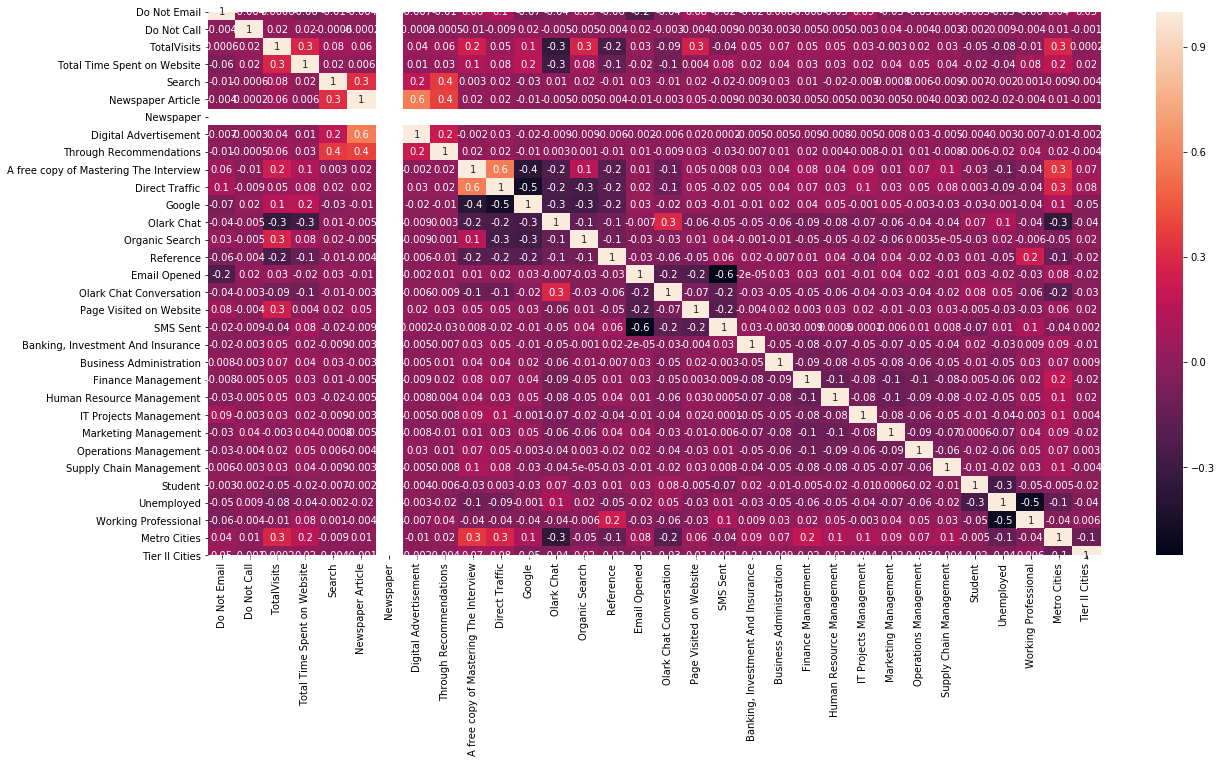

In [1630]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, fmt='.1g')
plt.show()

Analyze newspaper column

In [1631]:
md.Newspaper.value_counts()

0    7806
1       1
Name: Newspaper, dtype: int64

Since Newspaper has only one row as Yes and rest as No, it is of no use for us. Therefore will drop this column.

In [1632]:
# dropping Newspapaer column from test data.

X_test = X_test.drop(['Newspaper'], 1)

# dropping Newspapaer column from train data 
X_train = X_train.drop(['Newspaper'], 1)

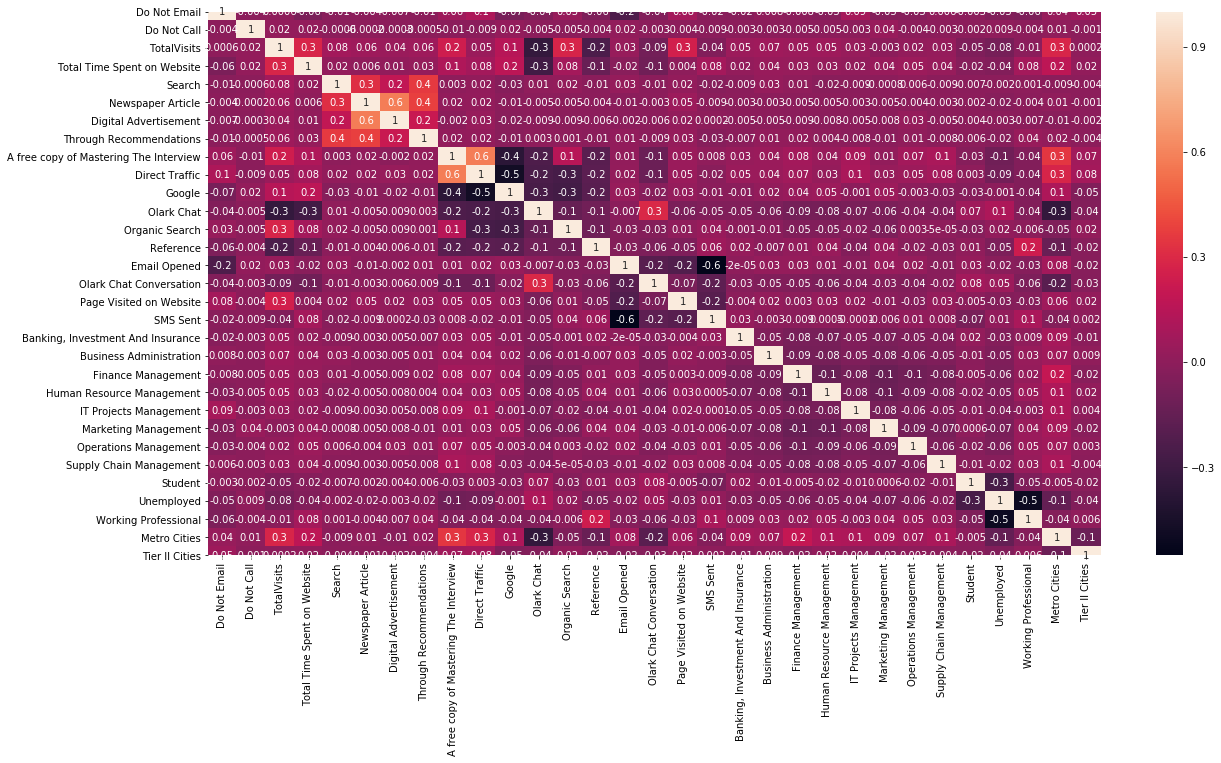

In [1633]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True, fmt='.1g')
plt.show()

# 7. Model Building

In [1634]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5432
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.1
Date:                Mon, 07 Sep 2020   Deviance:                       5026.3
Time:                        11:01:30   Pearson chi2:                 5.76e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.3137      0.223     -1.404      0.160      -0.752       0.124
Do Not Email                              -1.0097      0.162     -6.216      0.000      -1.328      -0.691
Do Not Call                               18.9190   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                0.1442      0.044      3.255      0.001       0.057       0.231
Total Time Spent on Website                1.0290      0.041     25.036      0.000       0.948       1.110
Search                                     0.0797      0.879      0.091      0.928      -1.643       1.802
Newspaper Article                        -19.4092   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                     -0.3667      1.462     -0.251      0.802      -3.232       2.499
Through Recommendations                    1.0605      1.410      0.752      0.452      -1.703       3.824
A free copy of Mastering The Interview    -0.2560      0.103     -2.483      0.013      -0.458      -0.054
Direct Traffic                            -2.4165      0.197    -12.243      0.000      -2.803      -2.030
Google                                    -2.0766      0.184    -11.268      0.000      -2.438      -1.715
Olark Chat                                -0.7269      0.191     -3.800      0.000      -1.102      -0.352
Organic Search                            -2.2900      0.204    -11.204      0.000      -2.691      -1.889
Reference                                  1.0593      0.254      4.169      0.000       0.561       1.557
Email Opened                               0.5800      0.120      4.849      0.000       0.346       0.814
Olark Chat Conversation                   -0.7615      0.204     -3.736      0.000      -1.161      -0.362
Page Visited on Website                   -0.0419      0.182     -0.230      0.818      -0.399       0.315
SMS Sent                                   1.6284      0.120     13.521      0.000       1.392       1.864
Banking, Investment And Insurance          0.4259      0.189      2.255      0.024       0.056       0.796
Business Administration                    0.2227      0.173      1.286      0.198      -0.117       0.562
Finance Management                         0.2641      0.125      2.112      0.035       0.019       0.509
Human Resource Management                  0.1034      0.127      0.812      0.417      -0.146       0.353
IT Projects Management                     0.2118      0.190      1.116      0.264      -0.160       0.584
Marketing Management                       0.3701      0.129      2.862      0.004       0.117       0.624
Operations Management                      0.1406      0.157      0.893      0.372     

# 8. Feature Selection Using RFE

In [1635]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1636]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [1637]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) # check for the columns 

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 6),
 ('Newspaper Article', True, 1),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', True, 1),
 ('A free copy of Mastering The Interview', True, 1),
 ('Direct Traffic', True, 1),
 ('Google', True, 1),
 ('Olark Chat', True, 1),
 ('Organic Search', True, 1),
 ('Reference', True, 1),
 ('Email Opened', True, 1),
 ('Olark Chat Conversation', True, 1),
 ('Page Visited on Website', False, 4),
 ('SMS Sent', True, 1),
 ('Banking, Investment And Insurance', True, 1),
 ('Business Administration', True, 1),
 ('Finance Management', True, 1),
 ('Human Resource Management', False, 2),
 ('IT Projects Management', True, 1),
 ('Marketing Management', True, 1),
 ('Operations Management', True, 1),
 ('Supply Chain Management', False, 3),
 ('Student', True, 1),
 ('Unemployed', True, 1),
 ('Working Professional', True, 1),
 ('Metro Cities', False, 

In [1638]:
col = X_train.columns[rfe.support_]

In [1639]:
X_train.columns[~rfe.support_] # columns which are not selected in RFE

Index(['Search', 'Page Visited on Website', 'Human Resource Management',
       'Supply Chain Management', 'Metro Cities', 'Tier II Cities'],
      dtype='object')

##### Assessing the model with StatsModels

In [1640]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5438
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.7
Date:                Mon, 07 Sep 2020   Deviance:                       5027.4
Time:                        11:01:30   Pearson chi2:                 5.76e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2951      0.210     -1.406      0.160      -0.707       0.116
Do Not Email                              -1.0099      0.162     -6.241      0.000      -1.327      -0.693
Do Not Call                               18.9230   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
TotalVisits                                0.1463      0.042      3.446      0.001       0.063       0.230
Total Time Spent on Website                1.0302      0.041     25.080      0.000       0.950       1.111
Newspaper Article                        -19.4202   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                     -0.3950      1.459     -0.271      0.787      -3.254       2.464
Through Recommendations                    1.0999      1.368      0.804      0.421      -1.580       3.780
A free copy of Mastering The Interview    -0.2403      0.101     -2.390      0.017      -0.437      -0.043
Direct Traffic                            -2.3986      0.196    -12.225      0.000      -2.783      -2.014
Google                                    -2.0566      0.183    -11.252      0.000      -2.415      -1.698
Olark Chat                                -0.7328      0.191     -3.842      0.000      -1.107      -0.359
Organic Search                            -2.2898      0.204    -11.228      0.000      -2.690      -1.890
Reference                                  1.0815      0.253      4.269      0.000       0.585       1.578
Email Opened                               0.5941      0.102      5.829      0.000       0.394       0.794
Olark Chat Conversation                   -0.7574      0.193     -3.918      0.000      -1.136      -0.379
SMS Sent                                   1.6398      0.104     15.765      0.000       1.436       1.844
Banking, Investment And Insurance          0.3984      0.182      2.186      0.029       0.041       0.755
Business Administration                    0.1922      0.167      1.152      0.249      -0.135       0.519
Finance Management                         0.2369      0.114      2.075      0.038       0.013       0.461
IT Projects Management                     0.1814      0.183      0.990      0.322      -0.178       0.541
Marketing Management                       0.3408      0.121      2.807      0.005       0.103       0.579
Operations Management                      0.1122      0.151      0.745      0.456      -0.183       0.407
Student                                    1.1348      0.239      4.758      0.000       0.667       1.602
Unemployed                                 1.1093      0.107     10.324      0.000       0.899       1.320
Working Professional                       3.4136      0.203     16.784      0.000     

In [1641]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1642]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Direct Traffic,4.88
23,Unemployed,4.63
9,Google,3.61
7,A free copy of Mastering The Interview,2.92
13,Email Opened,2.77
15,SMS Sent,2.43
11,Organic Search,2.39
10,Olark Chat,2.29
12,Reference,1.73
4,Newspaper Article,1.67


#### 1. Since VIF of all features is less than 5 we can drop the feature having highest P value

In [1643]:
# dropping Newspaper Article as it has very less significane
col3 = col.drop('Do Not Call')

X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5439
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.9
Date:                Mon, 07 Sep 2020   Deviance:                       5027.8
Time:                        11:01:31   Pearson chi2:                 5.76e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2955      0.210     -1.407      0.159      -0.707       0.116
Do Not Email                              -1.0098      0.162     -6.240      0.000      -1.327      -0.693
TotalVisits                                0.1467      0.042      3.456      0.001       0.064       0.230
Total Time Spent on Website                1.0306      0.041     25.091      0.000       0.950       1.111
Newspaper Article                        -19.4201   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                     -0.3956      1.459     -0.271      0.786      -3.254       2.463
Through Recommendations                    1.0997      1.368      0.804      0.421      -1.581       3.780
A free copy of Mastering The Interview    -0.2407      0.101     -2.393      0.017      -0.438      -0.044
Direct Traffic                            -2.3991      0.196    -12.227      0.000      -2.784      -2.015
Google                                    -2.0569      0.183    -11.253      0.000      -2.415      -1.699
Olark Chat                                -0.7327      0.191     -3.841      0.000      -1.107      -0.359
Organic Search                            -2.2906      0.204    -11.231      0.000      -2.690      -1.891
Reference                                  1.0815      0.253      4.269      0.000       0.585       1.578
Email Opened                               0.5946      0.102      5.834      0.000       0.395       0.794
Olark Chat Conversation                   -0.7573      0.193     -3.918      0.000      -1.136      -0.378
SMS Sent                                   1.6401      0.104     15.766      0.000       1.436       1.844
Banking, Investment And Insurance          0.3984      0.182      2.186      0.029       0.041       0.756
Business Administration                    0.1921      0.167      1.151      0.250      -0.135       0.519
Finance Management                         0.2369      0.114      2.075      0.038       0.013       0.461
IT Projects Management                     0.1815      0.183      0.991      0.322      -0.178       0.541
Marketing Management                       0.3427      0.121      2.825      0.005       0.105       0.581
Operations Management                      0.1122      0.151      0.745      0.456      -0.183       0.407
Student                                    1.1351      0.239      4.759      0.000       0.668       1.603
Unemployed                                 1.1099      0.107     10.328      0.000       0.899       1.320
Working Professional                       3.4140      0.203     16.785      0.000       3.015       3.813
=======================================================================================

In [1644]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Direct Traffic,4.88
22,Unemployed,4.63
8,Google,3.61
6,A free copy of Mastering The Interview,2.92
12,Email Opened,2.77
14,SMS Sent,2.43
10,Organic Search,2.39
9,Olark Chat,2.29
11,Reference,1.73
3,Newspaper Article,1.67


#### 2. Since VIF of all features is less than 5 we can drop the feature having highest P value, i.e. Newspaper Article

In [1645]:
# dropping Do Not Call as it has very less significane
col4 = col3.drop('Newspaper Article')

X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5440
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 07 Sep 2020   Deviance:                       5028.2
Time:                        11:01:32   Pearson chi2:                 5.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2986      0.210     -1.422      0.155      -0.710       0.113
Do Not Email                              -1.0096      0.162     -6.238      0.000      -1.327      -0.692
TotalVisits                                0.1462      0.042      3.444      0.001       0.063       0.229
Total Time Spent on Website                1.0308      0.041     25.094      0.000       0.950       1.111
Digital Advertisement                     -0.7154      1.332     -0.537      0.591      -3.326       1.895
Through Recommendations                    0.8324      1.211      0.688      0.492      -1.540       3.205
A free copy of Mastering The Interview    -0.2419      0.101     -2.405      0.016      -0.439      -0.045
Direct Traffic                            -2.3979      0.196    -12.222      0.000      -2.782      -2.013
Google                                    -2.0566      0.183    -11.251      0.000      -2.415      -1.698
Olark Chat                                -0.7331      0.191     -3.843      0.000      -1.107      -0.359
Organic Search                            -2.2896      0.204    -11.226      0.000      -2.689      -1.890
Reference                                  1.0809      0.253      4.267      0.000       0.584       1.577
Email Opened                               0.5961      0.102      5.851      0.000       0.396       0.796
Olark Chat Conversation                   -0.7563      0.193     -3.912      0.000      -1.135      -0.377
SMS Sent                                   1.6413      0.104     15.779      0.000       1.437       1.845
Banking, Investment And Insurance          0.3987      0.182      2.188      0.029       0.042       0.756
Business Administration                    0.1930      0.167      1.157      0.247      -0.134       0.520
Finance Management                         0.2382      0.114      2.087      0.037       0.014       0.462
IT Projects Management                     0.1819      0.183      0.993      0.321      -0.177       0.541
Marketing Management                       0.3430      0.121      2.827      0.005       0.105       0.581
Operations Management                      0.1141      0.150      0.758      0.448      -0.181       0.409
Student                                    1.1365      0.239      4.764      0.000       0.669       1.604
Unemployed                                 1.1117      0.107     10.349      0.000       0.901       1.322
Working Professional                       3.4172      0.203     16.804      0.000       3.019       3.816
==========================================================================================================
"""

In [1646]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Direct Traffic,4.88
21,Unemployed,4.63
7,Google,3.60
5,A free copy of Mastering The Interview,2.92
11,Email Opened,2.77
13,SMS Sent,2.43
9,Organic Search,2.39
8,Olark Chat,2.29
10,Reference,1.73
22,Working Professional,1.60


#### 3. Since VIF is less than 5 we can drop the feature having high P value, i.e. Digital Advertisement

In [1647]:
# dropping Digital Advertisement as it has very less significane
col5 = col4.drop('Digital Advertisement')

X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5441
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.2
Date:                Mon, 07 Sep 2020   Deviance:                       5028.5
Time:                        11:01:32   Pearson chi2:                 5.76e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2999      0.210     -1.429      0.153      -0.711       0.111
Do Not Email                              -1.0087      0.162     -6.233      0.000      -1.326      -0.692
TotalVisits                                0.1451      0.042      3.423      0.001       0.062       0.228
Total Time Spent on Website                1.0306      0.041     25.092      0.000       0.950       1.111
Through Recommendations                    0.6885      1.125      0.612      0.541      -1.517       2.894
A free copy of Mastering The Interview    -0.2390      0.100     -2.380      0.017      -0.436      -0.042
Direct Traffic                            -2.4008      0.196    -12.241      0.000      -2.785      -2.016
Google                                    -2.0559      0.183    -11.249      0.000      -2.414      -1.698
Olark Chat                                -0.7336      0.191     -3.846      0.000      -1.107      -0.360
Organic Search                            -2.2894      0.204    -11.226      0.000      -2.689      -1.890
Reference                                  1.0803      0.253      4.265      0.000       0.584       1.577
Email Opened                               0.5964      0.102      5.854      0.000       0.397       0.796
Olark Chat Conversation                   -0.7560      0.193     -3.911      0.000      -1.135      -0.377
SMS Sent                                   1.6411      0.104     15.778      0.000       1.437       1.845
Banking, Investment And Insurance          0.3998      0.182      2.194      0.028       0.043       0.757
Business Administration                    0.1942      0.167      1.164      0.244      -0.133       0.521
Finance Management                         0.2394      0.114      2.098      0.036       0.016       0.463
IT Projects Management                     0.1826      0.183      0.997      0.319      -0.177       0.542
Marketing Management                       0.3437      0.121      2.833      0.005       0.106       0.581
Operations Management                      0.1116      0.150      0.741      0.458      -0.183       0.406
Student                                    1.1370      0.239      4.767      0.000       0.670       1.605
Unemployed                                 1.1120      0.107     10.352      0.000       0.901       1.323
Working Professional                       3.4194      0.203     16.819      0.000       3.021       3.818
==========================================================================================================
"""

In [1648]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Direct Traffic,4.87
20,Unemployed,4.63
6,Google,3.60
4,A free copy of Mastering The Interview,2.92
10,Email Opened,2.77
12,SMS Sent,2.43
8,Organic Search,2.39
7,Olark Chat,2.29
9,Reference,1.73
21,Working Professional,1.60


#### 4. Since VIF is less than 5 we can drop the feature having high P value, i.e. Through Recommendations

In [1649]:
# dropping Through Recommendations as it has very less significane
col6 = col5.drop('Through Recommendations')

X_train_sm = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5442
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.4
Date:                Mon, 07 Sep 2020   Deviance:                       5028.9
Time:                        11:01:33   Pearson chi2:                 5.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2985      0.210     -1.422      0.155      -0.710       0.113
Do Not Email                              -1.0096      0.162     -6.238      0.000      -1.327      -0.692
TotalVisits                                0.1464      0.042      3.458      0.001       0.063       0.229
Total Time Spent on Website                1.0305      0.041     25.095      0.000       0.950       1.111
A free copy of Mastering The Interview    -0.2393      0.100     -2.384      0.017      -0.436      -0.043
Direct Traffic                            -2.3999      0.196    -12.238      0.000      -2.784      -2.016
Google                                    -2.0567      0.183    -11.253      0.000      -2.415      -1.698
Olark Chat                                -0.7330      0.191     -3.843      0.000      -1.107      -0.359
Organic Search                            -2.2907      0.204    -11.233      0.000      -2.690      -1.891
Reference                                  1.0805      0.253      4.265      0.000       0.584       1.577
Email Opened                               0.5961      0.102      5.852      0.000       0.396       0.796
Olark Chat Conversation                   -0.7569      0.193     -3.915      0.000      -1.136      -0.378
SMS Sent                                   1.6400      0.104     15.771      0.000       1.436       1.844
Banking, Investment And Insurance          0.3988      0.182      2.189      0.029       0.042       0.756
Business Administration                    0.1949      0.167      1.169      0.242      -0.132       0.522
Finance Management                         0.2409      0.114      2.111      0.035       0.017       0.465
IT Projects Management                     0.1817      0.183      0.991      0.322      -0.178       0.541
Marketing Management                       0.3429      0.121      2.826      0.005       0.105       0.581
Operations Management                      0.1112      0.150      0.739      0.460      -0.184       0.406
Student                                    1.1363      0.239      4.764      0.000       0.669       1.604
Unemployed                                 1.1118      0.107     10.350      0.000       0.901       1.322
Working Professional                       3.4259      0.203     16.863      0.000       3.028       3.824
==========================================================================================================
"""

In [1650]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Direct Traffic,4.87
19,Unemployed,4.63
5,Google,3.60
3,A free copy of Mastering The Interview,2.92
9,Email Opened,2.77
11,SMS Sent,2.43
7,Organic Search,2.39
6,Olark Chat,2.29
8,Reference,1.73
20,Working Professional,1.60


#### 5. Since VIF is less than 5 we can drop the feature having high P value, i.e. Operations Management

In [1651]:
# dropping Operations Management as it has very less significane
col7 = col6.drop('Operations Management')

X_train_sm = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5443
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.7
Date:                Mon, 07 Sep 2020   Deviance:                       5029.4
Time:                        11:01:33   Pearson chi2:                 5.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2925      0.210     -1.395      0.163      -0.704       0.119
Do Not Email                              -1.0120      0.162     -6.255      0.000      -1.329      -0.695
TotalVisits                                0.1466      0.042      3.462      0.001       0.064       0.230
Total Time Spent on Website                1.0313      0.041     25.125      0.000       0.951       1.112
A free copy of Mastering The Interview    -0.2357      0.100     -2.351      0.019      -0.432      -0.039
Direct Traffic                            -2.3918      0.196    -12.218      0.000      -2.776      -2.008
Google                                    -2.0496      0.182    -11.231      0.000      -2.407      -1.692
Olark Chat                                -0.7315      0.191     -3.836      0.000      -1.105      -0.358
Organic Search                            -2.2869      0.204    -11.218      0.000      -2.686      -1.887
Reference                                  1.0866      0.253      4.291      0.000       0.590       1.583
Email Opened                               0.5977      0.102      5.870      0.000       0.398       0.797
Olark Chat Conversation                   -0.7595      0.193     -3.931      0.000      -1.138      -0.381
SMS Sent                                   1.6410      0.104     15.783      0.000       1.437       1.845
Banking, Investment And Insurance          0.3857      0.181      2.127      0.033       0.030       0.741
Business Administration                    0.1817      0.166      1.096      0.273      -0.143       0.507
Finance Management                         0.2277      0.113      2.021      0.043       0.007       0.449
IT Projects Management                     0.1679      0.182      0.921      0.357      -0.189       0.525
Marketing Management                       0.3299      0.120      2.748      0.006       0.095       0.565
Student                                    1.1328      0.238      4.750      0.000       0.665       1.600
Unemployed                                 1.1088      0.107     10.331      0.000       0.898       1.319
Working Professional                       3.4274      0.203     16.880      0.000       3.029       3.825
==========================================================================================================
"""

In [1652]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Direct Traffic,4.80
18,Unemployed,4.62
5,Google,3.53
3,A free copy of Mastering The Interview,2.91
9,Email Opened,2.77
11,SMS Sent,2.43
7,Organic Search,2.38
6,Olark Chat,2.28
8,Reference,1.72
19,Working Professional,1.60


#### 6. Since VIF is less than 5 we can drop the feature having high P value, i.e. IT Projects Management

In [1653]:
# dropping IT Projects Management as it has very less significane
col8 = col7.drop('IT Projects Management')

X_train_sm = sm.add_constant(X_train[col8])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5444
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.1
Date:                Mon, 07 Sep 2020   Deviance:                       5030.3
Time:                        11:01:33   Pearson chi2:                 5.77e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2890      0.210     -1.379      0.168      -0.700       0.122
Do Not Email                              -1.0086      0.162     -6.230      0.000      -1.326      -0.691
TotalVisits                                0.1472      0.042      3.477      0.001       0.064       0.230
Total Time Spent on Website                1.0307      0.041     25.122      0.000       0.950       1.111
A free copy of Mastering The Interview    -0.2305      0.100     -2.303      0.021      -0.427      -0.034
Direct Traffic                            -2.3815      0.195    -12.188      0.000      -2.765      -1.999
Google                                    -2.0397      0.182    -11.200      0.000      -2.397      -1.683
Olark Chat                                -0.7307      0.191     -3.833      0.000      -1.104      -0.357
Organic Search                            -2.2832      0.204    -11.205      0.000      -2.683      -1.884
Reference                                  1.0922      0.253      4.316      0.000       0.596       1.588
Email Opened                               0.5977      0.102      5.870      0.000       0.398       0.797
Olark Chat Conversation                   -0.7615      0.193     -3.942      0.000      -1.140      -0.383
SMS Sent                                   1.6409      0.104     15.785      0.000       1.437       1.845
Banking, Investment And Insurance          0.3730      0.181      2.064      0.039       0.019       0.727
Business Administration                    0.1689      0.165      1.023      0.306      -0.155       0.493
Finance Management                         0.2149      0.112      1.923      0.054      -0.004       0.434
Marketing Management                       0.3176      0.119      2.664      0.008       0.084       0.551
Student                                    1.1299      0.238      4.739      0.000       0.663       1.597
Unemployed                                 1.1064      0.107     10.311      0.000       0.896       1.317
Working Professional                       3.4244      0.203     16.878      0.000       3.027       3.822
==========================================================================================================
"""

In [1654]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col8].columns
vif['VIF'] = [variance_inflation_factor(X_train[col8].values, i) for i in range(X_train[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Direct Traffic,4.74
17,Unemployed,4.61
5,Google,3.48
3,A free copy of Mastering The Interview,2.90
9,Email Opened,2.77
11,SMS Sent,2.43
7,Organic Search,2.37
6,Olark Chat,2.27
8,Reference,1.71
18,Working Professional,1.60


#### 7. Since VIF is less than 5 we can drop the feature having high P value, i.e. Business Administration

In [1655]:
# dropping Business Administration as it has very less significane
col9 = col8.drop('Business Administration')

X_train_sm = sm.add_constant(X_train[col9])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5445
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2515.7
Date:                Mon, 07 Sep 2020   Deviance:                       5031.3
Time:                        11:01:34   Pearson chi2:                 5.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2811      0.210     -1.342      0.180      -0.692       0.130
Do Not Email                              -1.0062      0.162     -6.218      0.000      -1.323      -0.689
TotalVisits                                0.1498      0.042      3.545      0.000       0.067       0.233
Total Time Spent on Website                1.0307      0.041     25.123      0.000       0.950       1.111
A free copy of Mastering The Interview    -0.2285      0.100     -2.284      0.022      -0.425      -0.032
Direct Traffic                            -2.3734      0.195    -12.157      0.000      -2.756      -1.991
Google                                    -2.0320      0.182    -11.168      0.000      -2.389      -1.675
Olark Chat                                -0.7285      0.191     -3.822      0.000      -1.102      -0.355
Organic Search                            -2.2815      0.204    -11.197      0.000      -2.681      -1.882
Reference                                  1.0985      0.253      4.342      0.000       0.603       1.594
Email Opened                               0.5983      0.102      5.879      0.000       0.399       0.798
Olark Chat Conversation                   -0.7661      0.193     -3.969      0.000      -1.144      -0.388
SMS Sent                                   1.6401      0.104     15.784      0.000       1.436       1.844
Banking, Investment And Insurance          0.3591      0.180      1.993      0.046       0.006       0.712
Finance Management                         0.2011      0.111      1.814      0.070      -0.016       0.418
Marketing Management                       0.3043      0.118      2.569      0.010       0.072       0.537
Student                                    1.1280      0.238      4.731      0.000       0.661       1.595
Unemployed                                 1.1033      0.107     10.285      0.000       0.893       1.314
Working Professional                       3.4219      0.203     16.874      0.000       3.024       3.819
==========================================================================================================
"""

In [1656]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col9].columns
vif['VIF'] = [variance_inflation_factor(X_train[col9].values, i) for i in range(X_train[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Direct Traffic,4.70
16,Unemployed,4.61
5,Google,3.44
3,A free copy of Mastering The Interview,2.90
9,Email Opened,2.76
11,SMS Sent,2.43
7,Organic Search,2.37
6,Olark Chat,2.27
8,Reference,1.71
17,Working Professional,1.60


#### 8. Since VIF is less than 5 we can drop the feature having high P value, i.e. Finance Management

In [1657]:
# dropping Finance Management as it has very less significane
col10 = col9.drop('Finance Management')

X_train_sm = sm.add_constant(X_train[col10])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5446
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2517.3
Date:                Mon, 07 Sep 2020   Deviance:                       5034.6
Time:                        11:01:34   Pearson chi2:                 5.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2637      0.209     -1.260      0.208      -0.674       0.147
Do Not Email                              -1.0128      0.162     -6.259      0.000      -1.330      -0.696
TotalVisits                                0.1518      0.042      3.596      0.000       0.069       0.235
Total Time Spent on Website                1.0290      0.041     25.116      0.000       0.949       1.109
A free copy of Mastering The Interview    -0.2194      0.100     -2.196      0.028      -0.415      -0.024
Direct Traffic                            -2.3520      0.195    -12.071      0.000      -2.734      -1.970
Google                                    -2.0101      0.182    -11.074      0.000      -2.366      -1.654
Olark Chat                                -0.7274      0.191     -3.816      0.000      -1.101      -0.354
Organic Search                            -2.2789      0.204    -11.184      0.000      -2.678      -1.880
Reference                                  1.1171      0.253      4.418      0.000       0.622       1.613
Email Opened                               0.5987      0.102      5.884      0.000       0.399       0.798
Olark Chat Conversation                   -0.7697      0.193     -3.996      0.000      -1.147      -0.392
SMS Sent                                   1.6378      0.104     15.771      0.000       1.434       1.841
Banking, Investment And Insurance          0.3259      0.179      1.819      0.069      -0.025       0.677
Marketing Management                       0.2714      0.117      2.320      0.020       0.042       0.501
Student                                    1.1282      0.238      4.739      0.000       0.662       1.595
Unemployed                                 1.0961      0.107     10.225      0.000       0.886       1.306
Working Professional                       3.4193      0.203     16.864      0.000       3.022       3.817
==========================================================================================================
"""

In [1658]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col10].columns
vif['VIF'] = [variance_inflation_factor(X_train[col10].values, i) for i in range(X_train[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Direct Traffic,4.63
15,Unemployed,4.61
5,Google,3.35
3,A free copy of Mastering The Interview,2.89
9,Email Opened,2.76
11,SMS Sent,2.43
7,Organic Search,2.36
6,Olark Chat,2.26
8,Reference,1.68
16,Working Professional,1.60


#### 9. Since VIF is less than 5 we can drop the feature having high P value, i.e. Banking, Investment And Insurance

In [1659]:
# dropping Banking, Investment And Insurance as it has very less significane
col11 = col10.drop('Banking, Investment And Insurance')

X_train_sm = sm.add_constant(X_train[col11])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5464
Model:                            GLM   Df Residuals:                     5447
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2518.9
Date:                Mon, 07 Sep 2020   Deviance:                       5037.9
Time:                        11:01:34   Pearson chi2:                 5.80e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2571      0.209     -1.228      0.219      -0.667       0.153
Do Not Email                              -1.0176      0.162     -6.290      0.000      -1.335      -0.701
TotalVisits                                0.1552      0.042      3.678      0.000       0.072       0.238
Total Time Spent on Website                1.0293      0.041     25.124      0.000       0.949       1.110
A free copy of Mastering The Interview    -0.2204      0.100     -2.207      0.027      -0.416      -0.025
Direct Traffic                            -2.3353      0.195    -12.001      0.000      -2.717      -1.954
Google                                    -2.0012      0.181    -11.030      0.000      -2.357      -1.646
Olark Chat                                -0.7230      0.191     -3.794      0.000      -1.096      -0.349
Organic Search                            -2.2716      0.204    -11.150      0.000      -2.671      -1.872
Reference                                  1.1336      0.253      4.487      0.000       0.638       1.629
Email Opened                               0.6014      0.102      5.910      0.000       0.402       0.801
Olark Chat Conversation                   -0.7692      0.193     -3.995      0.000      -1.147      -0.392
SMS Sent                                   1.6426      0.104     15.817      0.000       1.439       1.846
Marketing Management                       0.2548      0.117      2.186      0.029       0.026       0.483
Student                                    1.1314      0.237      4.765      0.000       0.666       1.597
Unemployed                                 1.0911      0.107     10.187      0.000       0.881       1.301
Working Professional                       3.4093      0.203     16.834      0.000       3.012       3.806
==========================================================================================================
"""

In [1660]:
#check for the VIF values
vif = pd.DataFrame()
vif['Features'] = X_train[col11].columns
vif['VIF'] = [variance_inflation_factor(X_train[col11].values, i) for i in range(X_train[col11].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Unemployed,4.61
4,Direct Traffic,4.59
5,Google,3.33
3,A free copy of Mastering The Interview,2.89
9,Email Opened,2.76
11,SMS Sent,2.43
7,Organic Search,2.35
6,Olark Chat,2.26
8,Reference,1.67
15,Working Professional,1.60


#### FInal Features after RFE and manual selection of features

In [1661]:
print(col11)
len(col11)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Direct Traffic', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Email Opened',
       'Olark Chat Conversation', 'SMS Sent', 'Marketing Management',
       'Student', 'Unemployed', 'Working Professional'],
      dtype='object')


16

# 9. Getting the predicted values on the train set

In [1662]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5001    0.211648
1114    0.107567
3028    0.338533
5546    0.067007
8044    0.980587
990     0.678150
8498    0.010496
6462    0.668154
938     0.279980
4162    0.383870
dtype: float64

In [1663]:
#Reshaping

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21164793, 0.1075675 , 0.33853308, 0.06700658, 0.98058737,
       0.67815019, 0.01049593, 0.66815412, 0.27997963, 0.38387015])

In [1664]:
y_train_pred

array([0.21164793, 0.1075675 , 0.33853308, ..., 0.62385708, 0.46377338,
       0.39893373])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1665]:
y_train.values

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [1666]:
y_train_pred

array([0.21164793, 0.1075675 , 0.33853308, ..., 0.62385708, 0.46377338,
       0.39893373])

In [1667]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values.ravel(), 'Conversion_Probability':y_train_pred})
y_train_pred_final['Index'] = y_train.index
y_train_pred_final.set_index('Index', inplace=True)

y_train_pred_final['Lead Number'] = y_train0['Lead Number']
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number
Index,,,
5001,0,0.211648,611920
1114,0,0.107567,648109
3028,1,0.338533,630801
5546,0,0.067007,607383
8044,1,0.980587,588143


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1668]:
y_train_pred_final['predicted'] = y_train_pred_final['Conversion_Probability'].map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted
Index,,,,
5001,0,0.211648,611920,0
1114,0,0.107567,648109,0
3028,1,0.338533,630801,0
5546,0,0.067007,607383,0
8044,1,0.980587,588143,1


In [1669]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2548  485]
 [ 661 1770]]


##### Accuracy

In [1670]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7902635431918009


##### Sensitivity : Number of actual Conversion predicted / Total Number of actual conversion


In [1671]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1672]:
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7280954339777869

##### Specificity : Number of actual non-Conversion predicted / Total Number of actual non-conversion


In [1673]:
Specificity = TN/float(TN+FP)
Specificity

0.840092317837125

##### ROC Curve

In [1674]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1675]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

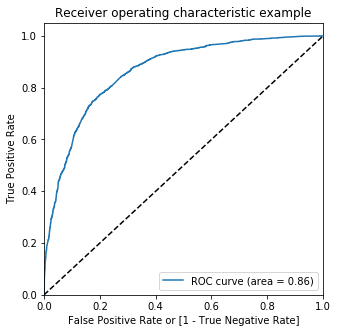

In [1676]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

##### Optimal Cutoff Point

In [1677]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Index,,,,,,,,,,,,,,
5001,0,0.211648,611920,0,1,1,1,0,0,0,0,0,0,0
1114,0,0.107567,648109,0,1,1,0,0,0,0,0,0,0,0
3028,1,0.338533,630801,0,1,1,1,1,0,0,0,0,0,0
5546,0,0.067007,607383,0,1,0,0,0,0,0,0,0,0,0
8044,1,0.980587,588143,1,1,1,1,1,1,1,1,1,1,1


In [1678]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.444912  1.000000  0.000000
0.1   0.1  0.574488  0.987659  0.243323
0.2   0.2  0.715593  0.941176  0.534784
0.3   0.3  0.761530  0.886466  0.661391
0.4   0.4  0.782211  0.793501  0.773162
0.5   0.5  0.790264  0.728095  0.840092
0.6   0.6  0.773243  0.633896  0.884932
0.7   0.7  0.737372  0.505142  0.923508
0.8   0.8  0.695827  0.369395  0.957468
0.9   0.9  0.648792  0.234471  0.980877


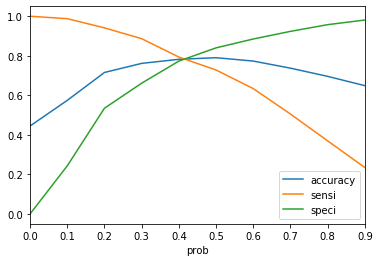

In [1679]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

It seems to be like probability near about .43 is the optimal cutoff point

In [1720]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.43 else 0)

y_train_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
Index,,,,,,,,,,,,,,,
5001,0,0.211648,611920,0,1,1,1,0,0,0,0,0,0,0,0
1114,0,0.107567,648109,0,1,1,0,0,0,0,0,0,0,0,0
3028,1,0.338533,630801,0,1,1,1,1,0,0,0,0,0,0,0
5546,0,0.067007,607383,0,1,0,0,0,0,0,0,0,0,0,0
8044,1,0.980587,588143,1,1,1,1,1,1,1,1,1,1,1,1


##### Accuracy after revision of Probability cut-off at optimal cut-off

In [1721]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7866032210834554

In [1682]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion)

[[2412  621]
 [ 545 1886]]


In [1683]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

##### Sensitivity after revision of Probability cut-off at optimal cut-off

In [1684]:
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7758124228712464

##### Specificity after revision of Probability cut-off at optimal cut-off

In [1685]:
Specificity = TN/float(TN+FP)
Specificity

0.7952522255192879

# 10. Validating logistic regression model on Test data-set 

In [1686]:
col11

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'A free copy of Mastering The Interview', 'Direct Traffic', 'Google',
       'Olark Chat', 'Organic Search', 'Reference', 'Email Opened',
       'Olark Chat Conversation', 'SMS Sent', 'Marketing Management',
       'Student', 'Unemployed', 'Working Professional'],
      dtype='object')

In [1687]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
5354,0,0,5.0,320,5.00,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
5162,0,0,7.0,1032,2.33,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
9226,0,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6271,0,0,0.0,0,0.00,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5386,0,0,8.0,396,2.67,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,0,0,6.0,973,6.00,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2185,0,0,3.0,264,3.00,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3393,0,0,5.0,164,5.00,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3226,0,0,2.0,183,2.00,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1688]:
# Scaling test dataset with the scaler
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,API,Landing Page Submission,Lead Add Form,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,Page Visited on Website,SMS Sent,"Banking, Investment And Insurance",Business Administration,Finance Management,Human Resource Management,IT Projects Management,Marketing Management,Operations Management,Supply Chain Management,Student,Unemployed,Working Professional,Metro Cities,Tier II Cities
5354,0,0,0.413602,-0.411909,1.266125,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
5162,0,0,1.028379,0.857676,-0.117831,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
9226,0,0,-1.123341,-0.982509,-1.325553,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6271,0,0,-1.123341,-0.982509,-1.325553,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5386,0,0,1.335767,-0.276391,0.058403,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,0,0,0.720990,0.752472,1.784461,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2185,0,0,-0.201175,-0.511764,0.229454,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3393,0,0,0.413602,-0.690076,1.266125,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3226,0,0,-0.508564,-0.656197,-0.288882,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1689]:
# dropping highly correlated features from training data
X_test = X_test.drop(['API', 'Landing Page Submission','Lead Add Form','Page Views Per Visit','X Education Forums'], 1)


In [1690]:
X_test[col11]

,Do Not Email,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Direct Traffic,Google,Olark Chat,Organic Search,Reference,Email Opened,Olark Chat Conversation,SMS Sent,Marketing Management,Student,Unemployed,Working Professional
5354,0,0.413602,-0.411909,1,1,0,0,0,0,0,0,0,0,0,1,0
5162,0,1.028379,0.857676,1,0,0,0,1,0,0,0,1,0,0,1,0
9226,0,-1.123341,-0.982509,0,0,0,1,0,0,0,0,1,0,0,1,0
6271,0,-1.123341,-0.982509,0,0,0,1,0,0,1,0,0,0,1,0,0
5386,0,1.335767,-0.276391,0,0,1,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7849,0,0.720990,0.752472,1,1,0,0,0,0,0,0,1,0,0,1,0
2185,0,-0.201175,-0.511764,0,0,1,0,0,0,1,0,0,1,0,1,0
3393,0,0.413602,-0.690076,1,0,0,0,1,0,1,0,0,0,0,0,0
3226,0,-0.508564,-0.656197,0,0,1,0,0,0,1,0,0,0,0,1,0


#### Prediction on test dataset

In [1691]:
# adding constaabsnt.

X_test_sm = sm.add_constant(X_test[col11])
y_test_pred = res.predict(X_test_sm)
y_test_pred.shape

(2343,)

In [1692]:
y_test_pred[:10]

5354    0.110906
5162    0.736314
9226    0.638327
6271    0.393444
5386    0.404138
7798    0.396886
248     0.136612
8525    0.180432
6996    0.770381
3808    0.383870
dtype: float64

In [1693]:
#Reshaping

y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.11090615, 0.73631395, 0.63832739, 0.39344405, 0.40413841,
       0.39688618, 0.13661178, 0.18043184, 0.77038149, 0.38387015])

In [1694]:
y_test_pred

array([0.11090615, 0.73631395, 0.63832739, ..., 0.05765536, 0.21079422,
       0.11858385])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1695]:
y_test.values

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [1696]:
y_test_pred.shape

(2343,)

In [1698]:
y_test.shape

(2343, 1)

In [1699]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values.ravel(), 'Conversion_Probability':y_test_pred})
y_test_pred_final['Index'] = y_test.index
y_test_pred_final.set_index('Index', inplace=True)

y_test_pred_final['Lead Number'] = y_test0['Lead Number']
y_test_pred_final.head()

,Converted,Conversion_Probability,Lead Number
Index,,,
5354,1,0.110906,608784
5162,0,0.736314,610375
9226,0,0.638327,579735
6271,0,0.393444,601727
5386,1,0.404138,608539


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1700]:
y_test_pred_final['predicted'] = y_test_pred_final['Conversion_Probability'].map(lambda x: 1 if x > 0.43 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_Probability,Lead Number,predicted
Index,,,,
5354,1,0.110906,608784,0
5162,0,0.736314,610375,1
9226,0,0.638327,579735,1
6271,0,0.393444,601727,0
5386,1,0.404138,608539,0


In [1701]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[1096  269]
 [ 222  756]]


##### Accuracy

In [1702]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.7904396073410158


##### Sensitivity : Number of actual Conversion predicted / Total Number of actual conversion


In [1703]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1704]:
Sensitivity = TP/float(TP+FN)
Sensitivity

0.7730061349693251

##### Specificity : Number of actual non-Conversion predicted / Total Number of actual non-conversion


In [1705]:
Specificity = TN/float(TN+FP)
Specificity

0.802930402930403

##### ROC Curve of TEST DATASET

In [1706]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1707]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, y_test_pred_final.Conversion_Probability, drop_intermediate = False )

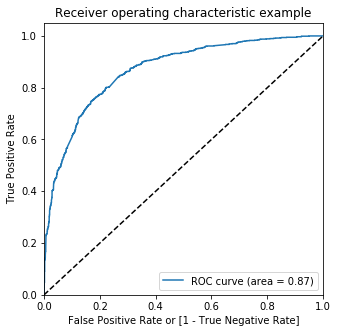

In [1708]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_Probability)

##### Conversion of Probability into lead score.

In [1725]:
y_test_pred_final['Lead Score'] = round(y_test_pred_final['Conversion_Probability']*100,2)
y_test_pred_final[['Lead Number','Lead Score']]

,Lead Number,Lead Score
Index,,
5354,608784,11.09
5162,610375,73.63
9226,579735,63.83
6271,601727,39.34
5386,608539,40.41
...,...,...
7849,589580,69.15
2185,638761,29.55
3393,627679,5.77


# Final Result:

    Accuracy of train dataset @ optimal cut-off of .43 : 0.79
    Accuracy of test dataset @ optimal cut-off of .43 : 0.79
    
    Sensitivity of train dataset @ optimal cut-off of .43: 0.76
    Sensitivity of test dataset @ optimal cut-off of .43: 0.77
    
    Specificity of train @ optimal cut-off of .43: 0.80
    Specificity of test @ optimal cut-off of .43: 0.80
    
    ROC Curve area of Train Dataset: 0.86    
    ROC Curve area of Test Dataset: 0.87
    
    Probabilities converted into lead score for Test Data.